## KHÁM PHÁ DỮ LIỆU

### 1. Đọc dữ liệu, tính số dòng và cột

Đầu tiên, ta import các thư viện cần thiết.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# .. import more libraries

Tiếp đến đọc các file điểm thi của các năm và lưu vào các dataframe tương ứng. Sau đó in ra 5 dòng đầu tiên.

In [2]:
grade_df = {}
grade_df['2020'] = pd.read_csv('data/diemthi2020_final.csv')
grade_df['2020'].head()

,Unnamed: 0,SBD,Tỉnh/Thành phố,Toán,Văn,Lí,Hóa,Sinh,TB-KHTN,Sử,Địa,GDCD,TB-KHXH,Ngoại ngữ
0,0,18014547,BẮC GIANG,6.4,6.75,NaN,NaN,NaN,NaN,4.75,7.00,6.50,6.08,4.2
1,1,18014530,BẮC GIANG,7.6,6.00,NaN,NaN,NaN,NaN,3.75,7.75,7.75,6.42,2.8
2,2,18014521,BẮC GIANG,4.8,4.75,NaN,NaN,NaN,NaN,4.00,6.50,NaN,5.25,NaN
3,3,18014517,BẮC GIANG,8.0,7.00,NaN,NaN,NaN,NaN,8.25,8.00,9.50,8.58,5.8
4,4,18014523,BẮC GIANG,8.2,6.50,8.0,8.5,5.0,7.17,NaN,NaN,NaN,NaN,4.0


In [3]:
grade_df['2021'] = pd.read_csv('data/diemthi2021_final.csv')
grade_df['2021'].head()

,Unnamed: 0,SBD,Toán,Lí,Hóa,Sinh,Sử,Địa,Văn,GDCD,Ngoại ngữ,Tỉnh/Thành phố,TB-KHTN,TB-KHXH
0,0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,HÀ NỘI,NaN,8.25
1,1,1000003,4.4,NaN,NaN,NaN,4.25,4.00,6.25,NaN,NaN,HÀ NỘI,NaN,NaN
2,2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,HÀ NỘI,3.50,NaN
3,3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,HÀ NỘI,6.42,NaN
4,4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,HÀ NỘI,NaN,6.92


In [4]:
grade_df['2022'] = pd.read_csv('data/diemthi2022_final.csv')
grade_df['2022'].head()

,Unnamed: 0,SBD,Toán,Văn,Ngoại ngữ,Lí,Hóa,Sinh,Sử,Địa,GDCD,Tỉnh/Thành phố,TB-KHTN,TB-KHXH
0,0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,HÀ NỘI,NaN,5.83
1,1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,HÀ NỘI,NaN,8.08
2,2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,HÀ NỘI,NaN,7.17
3,3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,HÀ NỘI,NaN,7.17
4,4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,HÀ NỘI,NaN,8.25


Tính số dòng, số cột và lưu vào 2 biến `n_rows` và `n_cols`.

In [5]:
n_rows = {}
n_cols = {}
for year in grade_df.keys():
    n_rows[year], n_cols[year] = grade_df[year].shape
    print(f'Number of rows in {year}: {n_rows[year]}')
    print(f'Number of columns in {year}: {n_cols[year]}')

Number of rows in 2020: 870486
Number of columns in 2020: 14
Number of rows in 2021: 960902
Number of columns in 2021: 14
Number of rows in 2022: 995441
Number of columns in 2022: 14


### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng trong tập dữ liệu này tương ứng với điểm thi các môn của một thí sinh riêng biệt. Gồm các môn Toán, Ngữ Văn, Ngoại Ngữ, Vật Lý, Hóa Học, Sinh Học, Lịch Sử, Địa Lý, GDCD và điểm trung bình các tổ hợp môn.
Do vậy, ta có thể thấy rằng không có dòng nào bị "lạc loài".

### 3. Dữ liệu có các dòng bị lặp không?

Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương `duplicated()` và `any()` trên các dataframe `grade_df` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị `True` nếu dữ liệu có các dòng bị lặp và có giá trị `False` nếu ngược.

In [6]:
have_duplicate_rows = {}
for year in grade_df.keys():
    have_duplicate_rows[year] = grade_df[year].duplicated().any()
    print(f'Have duplicate rows in {year}: {have_duplicate_rows[year]}')

Have duplicate rows in 2020: False
Have duplicate rows in 2021: False
Have duplicate rows in 2022: False


Như vậy ta thấy rằng dữ liệu không có các dòng bị lặp.

### 4. Kiểu dữ liệu của mỗi cột

Ta sử dụng phương thức `dtypes` trên `grade_df` để xem kiểu dữ liệu của mỗi cột. Kết quả được lưu vào dataframe `col_dtypes`; dataframe này có tên dòng là các năm và tên cột là các cột trong `grade_df`.

In [7]:
col_dtypes = {}
for year in grade_df.keys():
    col_dtypes[year] = grade_df[year].dtypes
col_dtypes = pd.DataFrame(col_dtypes).T
col_dtypes

,GDCD,Hóa,Lí,Ngoại ngữ,SBD,Sinh,Sử,TB-KHTN,TB-KHXH,Toán,Tỉnh/Thành phố,Unnamed: 0,Văn,Địa
2020,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,object,int64,float64,float64
2021,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,object,int64,float64,float64
2022,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,object,int64,float64,float64


Có thể thấy, kiểu dữ liệu các cột ở ba năm đều giống nhau. Về mặt kiểu dữ liệu, các thuộc tính của tập dữ liệu này đã ở định dạng phù hợp, nên không cần phải xử lý.

### 5. Xem xét sự phân bố giá trị của các cột dữ liệu dạng số.

Ta cần xem xét đến các giá trị thiếu trong dữ liệu:
- Không thực hiện thống kê trên 3 cột SBD, Unnamed và Tỉnh/Thành phố do các cột này không có ý nghĩa và cột Tỉnh/Thành phố không phải dạng số và sẽ được xem xét sau.
- Đầu tiên, ta tính tỉ lệ giá trị thiếu của từng cột bằng cách sử dụng phương thức `isnull()` trên dataframe `grade_df` và tính tổng số giá trị thiếu của từng cột bằng phương thức `sum()`. 
- Cuối cùng ta chia số dòng và lưu kết quả vào `missing_ratio`.

In [8]:
missing_ratio = {}
for year in grade_df.keys():
    missing_ratio[year] = grade_df[year].select_dtypes(include=['float64']).isnull().sum() / n_rows[year]
missing_ratio = pd.DataFrame(missing_ratio).T
missing_ratio

,GDCD,Hóa,Lí,Ngoại ngữ,Sinh,Sử,TB-KHTN,TB-KHXH,Toán,Văn,Địa
2020,0.445161,0.660493,0.663077,0.113027,0.666420,0.346823,0.658150,0.346564,0.004486,0.015992,0.362342
2021,0.460029,0.651471,0.653136,0.122572,0.657041,0.354898,0.660342,0.460237,0.010607,0.013516,0.360770
2022,0.443118,0.671134,0.672986,0.125404,0.676326,0.337317,0.679855,0.443372,0.012773,0.014098,0.339568


Có thể thấy, các cột phân loại như `SBD`, `Tỉnh/Thành phố`, `Unnamed` (tương ứng với số thứ tự) đều có tỉ lệ giá trị thiếu là 0. Các cột còn lại đều là cột điểm thi và có tỉ lệ giá trị thiếu khác 0. Điều này cho thấy rằng có một số thí sinh không thi một số môn nào đó và không ảnh hưởng đến việc phân tích sau này.

Ta cũng cần tính các giá trị thống kê mô tả của các cột numeric bằng phương thức `describe()` trên `grade_df`.

In [9]:
print(f'Descriptive statistics of 2020:')
grade_df['2020'].describe()

Descriptive statistics of 2020:


,Unnamed: 0,SBD,Toán,Văn,Lí,Hóa,Sinh,TB-KHTN,Sử,Địa,GDCD,TB-KHXH,Ngoại ngữ
count,870486.00000,8.704860e+05,866581.000000,856565.000000,293287.000000,295536.000000,290377.000000,297576.000000,568581.000000,555072.000000,482980.000000,568807.000000,772098.000000
mean,435242.50000,2.800845e+07,6.662271,6.601825,6.718001,6.705225,5.588041,6.341871,5.181097,6.773215,8.125164,6.549127,4.568337
std,251287.80755,1.898843e+07,1.819042,1.248463,1.497900,1.607924,1.350572,1.109016,1.598987,1.171702,1.090310,1.215503,1.808446
min,0.00000,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,217621.25000,1.200657e+07,5.400000,6.000000,5.750000,5.500000,4.750000,5.670000,4.000000,6.000000,7.500000,5.830000,3.200000
50%,435242.50000,2.801803e+07,7.000000,6.750000,7.000000,7.000000,5.500000,6.500000,5.000000,7.000000,8.250000,6.580000,4.200000
75%,652863.75000,4.400927e+07,8.000000,7.500000,7.750000,8.000000,6.500000,7.170000,6.250000,7.500000,9.000000,7.380000,5.600000
max,870485.00000,6.400582e+07,10.000000,10.000000,10.000000,10.000000,10.000000,9.880000,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
print(f'Descriptive statistics of 2021:')
grade_df['2021'].describe()

Descriptive statistics of 2021:


,Unnamed: 0,SBD,Toán,Lí,Hóa,Sinh,Sử,Địa,Văn,GDCD,Ngoại ngữ,TB-KHTN,TB-KHXH
count,960902.000000,9.609020e+05,950710.000000,333302.000000,334902.000000,329550.000000,619880.000000,614237.000000,947914.000000,518859.000000,843122.000000,326378.000000,518659.000000
mean,454884.513203,2.632163e+07,6.618351,6.582776,6.634617,5.511298,4.975644,6.955494,6.483819,8.377862,5.855004,6.237838,6.833293
std,276207.978731,1.906657e+07,1.683284,1.393538,1.598686,1.443058,1.770025,1.178250,1.363939,1.155020,2.216757,1.073473,1.142297
min,0.000000,1.000002e+06,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580000,0.420000
25%,213940.250000,8.003250e+06,5.400000,5.750000,5.500000,4.500000,3.500000,6.250000,5.750000,7.750000,4.000000,5.500000,6.080000
50%,454165.500000,2.601839e+07,7.000000,6.750000,7.000000,5.500000,4.750000,7.000000,6.500000,8.500000,5.600000,6.330000,6.830000
75%,694390.750000,4.200339e+07,8.000000,7.750000,8.000000,6.500000,6.250000,7.750000,7.500000,9.250000,7.800000,7.000000,7.670000
max,934616.000000,6.400684e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.670000,9.920000


In [11]:
print(f'Descriptive statistics of 2022:')
grade_df['2022'].describe()

Descriptive statistics of 2022:


,Unnamed: 0,SBD,Toán,Văn,Ngoại ngữ,Lí,Hóa,Sinh,Sử,Địa,GDCD,TB-KHTN,TB-KHXH
count,995441.000000,9.954410e+05,982726.000000,981407.000000,870609.000000,325523.000000,327367.000000,322198.000000,659662.000000,657421.000000,554343.000000,318685.000000,554090.000000
mean,497720.000000,2.759692e+07,6.466254,6.507746,5.157686,6.723779,6.703898,5.019109,6.343930,6.677929,8.033266,6.137013,7.088246
std,287359.208994,1.917092e+07,1.675435,1.379602,1.949547,1.441925,1.600393,1.448270,1.612879,1.215013,1.067272,1.102178,1.086883
min,0.000000,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000
25%,248860.000000,1.000217e+07,5.400000,5.580000,3.600000,5.750000,5.500000,4.000000,5.250000,5.750000,7.500000,5.420000,6.420000
50%,497720.000000,2.801886e+07,6.800000,6.500000,4.800000,7.000000,7.000000,4.750000,6.500000,6.750000,8.250000,6.250000,7.170000
75%,746580.000000,4.400582e+07,7.800000,7.500000,6.600000,7.750000,8.000000,6.000000,7.500000,7.500000,8.750000,6.920000,7.830000
max,995440.000000,6.400659e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.670000,10.000000


### 6. Xem xét sự phân bố giá trị của các cột dữ liệu không phải dạng số.

Trong 3 bộ dữ liệu về điểm thi của cả 3 năm thì chỉ có duy nhất cột 'Tỉnh/Thành phố' là cột có kiểu dữ liệu không phải dạng số.

**Nhận xét:** Do cột 'Tỉnh/Thành phố' có thể được suy ra từ SBD của thí sinh, do đó có thể rút ra một số nhận xét sau:
- Không tồn tại giá trị thiếu trong cột 'Tỉnh/Thành phố' do tương ứng với mỗi thí sinh trong bộ dữ liệu đều sẽ suy ra được mã tỉnh.
- Số lượng các giá trị khác nhau của cột này cũng sẽ bằng 63, chính là 63 tỉnh thành trên đất nước Việt Nam (tuy mã tỉnh lớn nhất là 64 nhưng không có mã tỉnh 20, nên tương ứng chỉ có 63 tỉnh thành).
- Ta sẽ thực hiện tính tỉ lệ % (từ 0 đến 100) của mỗi giá trị khác nhau trong cột 'Tỉnh/Thành phố' được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios). Sau đó lưu vào DataFrame với dòng là value_ratios và cột tương ứng là 3 năm từ 2020 đến 2022. 
- Viết hàm 'computeValueRatios' nhận vào một DataFrame dữ liệu của một năm và trả về dictionary lưu value_ratios cần tính đã trình bày ở trên của năm đó.
- Sau khi có được ba dictionary cho ba năm, dùng chúng tạo thành một DataFrame.

In [12]:
def computeValueRatios(df):
    col_name='Tỉnh/Thành phố'
    df=df.copy()
    df=df.select_dtypes(exclude=['float64','int64'])
    vals=list(df[col_name].values)
    num_vals=list(set(vals))
    dic={}
    new=[(df[col_name].value_counts()[j]/len(vals)*100).round(3) for j in num_vals]
    dic={num_vals[j]:new[j] for j in range(len(num_vals))}
    dic_sort={k:v for k,v in sorted(dic.items(), key= lambda item:item[1], reverse=True)}
    return dic_sort

In [13]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
col_names=['2020','2021','2022']
titles=["value_ratios"]
values_list=[computeValueRatios(grade_df[f'{i}']) for i in range(2020,2023)]
dic={col_names[i]:[values_list[i]] for i in range(len(col_names))}
dic['titles']=titles
categorical_info_df=pd.DataFrame(dic).set_index('titles')
categorical_info_df

C:\Users\PhiHungTF\AppData\Local\Temp\ipykernel_10456\4207576729.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,2020,2021,2022
titles,,,
value_ratios,"{'HÀ NỘI': 9.059, 'HỒ CHÍ MINH': 8.553, 'THANH HÓA': 3.991, 'NGHỆ AN': 3.57, 'ĐỒNG NAI': 3.246, 'THÁI BÌNH': 2.251, 'HẢI DƯƠNG': 2.25, 'BẮC GIANG': 2.217, 'NAM ĐỊNH': 2.144, 'HẢI PHÒNG': 2.129, 'BÌNH ĐỊNH': 1.939, 'HÀ TĨNH': 1.759, 'AN GIANG': 1.751, 'THÁI NGUYÊN': 1.745, 'BẮC NINH': 1.68, 'QUẢNG NINH': 1.671, 'TIỀN GIANG': 1.641, 'ĐẮK LẮK': 1.602, 'LONG AN': 1.591, 'PHÚ THỌ': 1.586, 'LÂM ĐỒNG': 1.551, 'ĐỒNG THÁP': 1.538, 'GIA LAI': 1.53, 'KHÁNH HÒA': 1.504, 'HƯNG YÊN': 1.468, 'THỪA THIÊN - HUẾ': 1.438, 'KIÊN GIANG': 1.428, 'VĨNH PHÚC': 1.398, 'QUẢNG NGÃI': 1.375, 'SƠN LA': 1.336, 'BÀ RỊA – VŨNG TÀU': 1.314, 'BÌNH DƯƠNG': 1.308, 'BẾN TRE': 1.3, 'BÌNH THUẬN': 1.251, 'QUẢNG BÌNH': 1.224, 'CẦN THƠ': 1.223, 'VĨNH LONG': 1.173, 'PHÚ YÊN': 1.158, 'BÌNH PHƯỚC': 1.123, 'CÀ MAU': 1.107, 'NINH BÌNH': 1.059, 'HÒA BÌNH': 1.051, 'HÀ NAM': 0.985, 'TÂY NINH': 0.982, 'LẠNG SƠN': 0.978, 'SÓC TRĂNG': 0.978, 'TUYÊN QUANG': 0.918, 'QUẢNG TRỊ': 0.907, 'TRÀ VINH': 0.906, 'YÊN BÁI': 0.851, 'QUẢNG NAM': 0.836, 'LÀO CAI': 0.73, 'ĐĂK NÔNG': 0.714, 'HẬU GIANG': 0.668, 'NINH THUẬN': 0.657, 'HÀ GIANG': 0.646, 'ĐIỆN BIÊN': 0.644, 'BẠC LIÊU': 0.642, 'CAO BẰNG': 0.528, 'KON TUM': 0.493, 'LAI CHÂU': 0.379, 'BẮC KẠN': 0.328}","{'HÀ NỘI': 10.479, 'HỒ CHÍ MINH': 8.977, 'THANH HÓA': 4.167, 'NGHỆ AN': 3.572, 'HẢI PHÒNG': 2.445, 'THÁI BÌNH': 2.379, 'HẢI DƯƠNG': 2.317, 'ĐỒNG NAI': 2.231, 'BẮC GIANG': 2.182, 'NAM ĐỊNH': 2.177, 'ĐẮK LẮK': 2.059, 'BÌNH ĐỊNH': 1.867, 'HÀ TĨNH': 1.797, 'THÁI NGUYÊN': 1.76, 'QUẢNG NAM': 1.738, 'QUẢNG NINH': 1.703, 'LONG AN': 1.702, 'BẮC NINH': 1.7, 'TIỀN GIANG': 1.69, 'PHÚ THỌ': 1.681, 'LÂM ĐỒNG': 1.489, 'HƯNG YÊN': 1.475, 'VĨNH PHÚC': 1.457, 'GIA LAI': 1.45, 'KIÊN GIANG': 1.426, 'THỪA THIÊN - HUẾ': 1.383, 'BẾN TRE': 1.371, 'BÌNH DƯƠNG': 1.353, 'BÀ RỊA – VŨNG TÀU': 1.349, 'QUẢNG NGÃI': 1.346, 'ĐÀ NẴNG': 1.314, 'CẦN THƠ': 1.261, 'BÌNH THUẬN': 1.253, 'QUẢNG BÌNH': 1.239, 'SƠN LA': 1.185, 'VĨNH LONG': 1.182, 'NINH BÌNH': 1.15, 'CÀ MAU': 1.136, 'BÌNH PHƯỚC': 1.078, 'HÀ NAM': 1.006, 'TÂY NINH': 1.004, 'SÓC TRĂNG': 0.998, 'LẠNG SƠN': 0.992, 'HÒA BÌNH': 0.986, 'TRÀ VINH': 0.916, 'TUYÊN QUANG': 0.903, 'QUẢNG TRỊ': 0.883, 'YÊN BÁI': 0.842, 'LÀO CAI': 0.763, 'HẬU GIANG': 0.709, 'ĐĂK NÔNG': 0.695, 'KHÁNH HÒA': 0.671, 'BẠC LIÊU': 0.659, 'ĐIỆN BIÊN': 0.652, 'NINH THUẬN': 0.621, 'HÀ GIANG': 0.583, 'AN GIANG': 0.577, 'CAO BẰNG': 0.493, 'KON TUM': 0.482, 'PHÚ YÊN': 0.373, 'LAI CHÂU': 0.371, 'BẮC KẠN': 0.301}","{'HÀ NỘI': 9.739, 'HỒ CHÍ MINH': 8.498, 'THANH HÓA': 3.764, 'NGHỆ AN': 3.673, 'ĐỒNG NAI': 3.151, 'HẢI PHÒNG': 2.25, 'BẮC GIANG': 2.065, 'HẢI DƯƠNG': 2.052, 'ĐẮK LẮK': 2.044, 'THÁI BÌNH': 2.024, 'NAM ĐỊNH': 1.986, 'AN GIANG': 1.866, 'BÌNH ĐỊNH': 1.857, 'HÀ TĨNH': 1.738, 'QUẢNG NAM': 1.682, 'BẮC NINH': 1.592, 'PHÚ THỌ': 1.588, 'QUẢNG NINH': 1.57, 'LONG AN': 1.539, 'THÁI NGUYÊN': 1.515, 'ĐỒNG THÁP': 1.511, 'TIỀN GIANG': 1.51, 'KIÊN GIANG': 1.439, 'LÂM ĐỒNG': 1.417, 'GIA LAI': 1.414, 'KHÁNH HÒA': 1.409, 'HƯNG YÊN': 1.395, 'VĨNH PHÚC': 1.394, 'THỪA THIÊN - HUẾ': 1.336, 'QUẢNG NGÃI': 1.336, 'BÌNH DƯƠNG': 1.286, 'BÌNH THUẬN': 1.279, 'BÀ RỊA – VŨNG TÀU': 1.272, 'ĐÀ NẴNG': 1.263, 'BẾN TRE': 1.236, 'CẦN THƠ': 1.225, 'SƠN LA': 1.138, 'QUẢNG BÌNH': 1.117, 'PHÚ YÊN': 1.092, 'BÌNH PHƯỚC': 1.075, 'CÀ MAU': 1.074, 'NINH BÌNH': 1.055, 'VĨNH LONG': 1.037, 'SÓC TRĂNG': 1.003, 'TÂY NINH': 0.981, 'LẠNG SƠN': 0.965, 'HÒA BÌNH': 0.962, 'TRÀ VINH': 0.95, 'HÀ NAM': 0.923, 'QUẢNG TRỊ': 0.868, 'TUYÊN QUANG': 0.846, 'YÊN BÁI': 0.808, 'LÀO CAI': 0.724, 'ĐĂK NÔNG': 0.688, 'HẬU GIANG': 0.658, 'BẠC LIÊU': 0.644, 'ĐIỆN BIÊN': 0.644, 'NINH THUẬN': 0.59, 'HÀ GIANG': 0.589, 'CAO BẰNG': 0.507, 'KON TUM': 0.475, 'LAI CHÂU': 0.368, 'BẮC KẠN': 0.307}"


**Nhận xét:**
- Số lượng các thí sinh thi của các tỉnh thành tham dự kì thi qua các năm luôn đông nhất ở 5 tỉnh thành lớn là: Hà Nội, Hồ Chí Minh, Thanh Hóa, Nghệ An, Đồng Nai.
- Những tỉnh thành đóng góp ít thí sinh nhất cho kì thi luôn là những nơi vùng cao như: Cao Bằng, Kon Tum, Lai Châu, Bắc Cạn.
- Số lượng thí sinh thi ở mỗi tỉnh qua các năm không chênh lệch nhau nhiều lắm cho thấy được sự ổn định của việc tốt nghiệp THPT ở các tỉnh thành.

# ĐƯA RA CÁC CÂU HỎI VÀ TRẢ LỜI

## Câu hỏi:

### Nội dung câu hỏi:

Phổ điểm từng môn theo từng năm học.

### Ý nghĩa khi trả lời được câu hỏi

Có một cái nhìn tổng quát về điểm thi của các môn trong các năm qua.

### Tiền xử lý

Không cần thiết cho câu hỏi này.

### Phân tích dữ liệu để trả lời câu hỏi

Để trả lời cho câu hỏi này, ta sẽ làm như sau:

Bước 1: Tạo một dictionaty 'grade_dict' gồm:
- các key là các môn thi
- các value là một DataFrame có 2 cột là 'grade' là điểm thi và 'count' là số lượng thí sinh thi được điểm đó.

Bước 2: Vẽ barchart cho từng môn thi theo từng năm học và phân tích tổng quát về điểm thi của mỗi môn.

Code bước 0: Ta tạo các hằng và hàm cần thiết:
- `SUBJECT_NAMES`: danh sách các môn thi
- `round_to_025`: hàm làm tròn số thực đến gần nhất 0.25
- `analyze`: hàm in ra phân tích dữ liệu của một môn thi theo từng năm học

In [78]:
# name of every subject
SUBJECT_NAMES = ['Toán', 'Văn', 'Ngoại ngữ', 'Lí', 'Hóa', 'Sinh', 'Sử', 'Địa', 'GDCD']

def round_to_025(x):
	"""round a number to the nearest 0.25"""
	return round(x * 4) / 4

def analyze(subject_df, subject_name, year):
	"""print out some statistics of a subject in a year

	Args:
		subject_df (DataFrame): grade distribution of a subject
		subject_name (str): name of the subject
		year (int): year of the exam
	"""
	n_candidates = np.sum(subject_df['count']) # number of candidates
	grades = np.repeat(subject_df['grade'].values, subject_df['count'].values) # array of grades
	mean = grades.mean() # mean
	median = np.median(grades) # median
	mode = subject_df['grade'][subject_df['count'].idxmax()] # mode
	paralysis_point = subject_df[subject_df['grade'] <= 1]['count'].sum() # paralysis point
	paralysis_point_ratio = paralysis_point / n_candidates * 100 # paralysis point ratio
	less_than_avg = subject_df[subject_df['grade'] < 5]['count'].sum() # number of candidates with grade less than 5
	less_than_avg_ratio = less_than_avg / n_candidates * 100 # ratio of candidates with grade less than 5
	perfect_score = subject_df[subject_df['grade'] == 10]['count'].sum() # number of candidates with perfect score
	print(f'Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn {subject_name} của cả nước năm {year} cho thấy: '
	f'Có {n_candidates} thí sinh tham gia thi bài thi {subject_name} trong đó điểm trung bình là '
	f'{mean:.2f} điểm, điểm trung vị là {median:.2f} điểm, điểm số có nhiều thí sinh đạt nhất là '
	f'{mode:.2f} điểm. Số thí sinh có điểm <= 1 là {paralysis_point} (chiếm tỉ lệ {paralysis_point_ratio:.3f}%); '
	f'số thí sinh dưới trung bình là {less_than_avg} (chiếm tỉ lệ {less_than_avg_ratio:.3f}%); '
	f'có {perfect_score} thí sinh đạt điểm 10.')

Code bước 1: Ta xét năm 2020, ta sẽ tạo `grade_dict` bằng cách lặp qua các môn thi, với mỗi môn tiến hành đếm số lượng thí sinh thi được điểm đó.

In [80]:
year = '2020'
grade_dict = {}
for subject in SUBJECT_NAMES:
	grade_dict[subject] = grade_df[year][subject].dropna()
	grade_dict[subject] = grade_dict[subject].value_counts().sort_index()
	grade_dict[subject] = grade_dict[subject].rename_axis('grade').reset_index(name='count')

grade_dict['Văn'].head(10) # in ra 10 dòng đầu tiên của bảng điểm môn Văn

,grade,count
0,0.00,32
1,0.25,13
2,0.50,23
3,0.75,44
4,1.00,25
5,1.25,141
6,1.50,202
7,1.67,1
8,1.75,267
9,2.00,543


Có thể thấy, điểm môn Văn có thể là bất cứ giá trị nào trong khoảng từ 0 đến 10. Điều này sẽ gây khó khăn cho việc vẽ biểu đồ. Do đó, ta sẽ làm tròn điểm môn Văn đến gần nhất 0.25.

In [81]:
grade_dict['Văn']['grade'] = grade_dict['Văn']['grade'].apply(round_to_025)
grade_dict['Văn'] = grade_dict['Văn'].groupby('grade').sum().reset_index()
grade_dict['Văn'].head(10)

,grade,count
0,0.00,32
1,0.25,13
2,0.50,23
3,0.75,44
4,1.00,25
5,1.25,141
6,1.50,202
7,1.75,268
8,2.00,543
9,2.25,803


Code bước 2: Ta vẽ biểu đồ barplot cho từng môn thi theo từng năm học và phân tích tổng quát về điểm thi của mỗi môn.

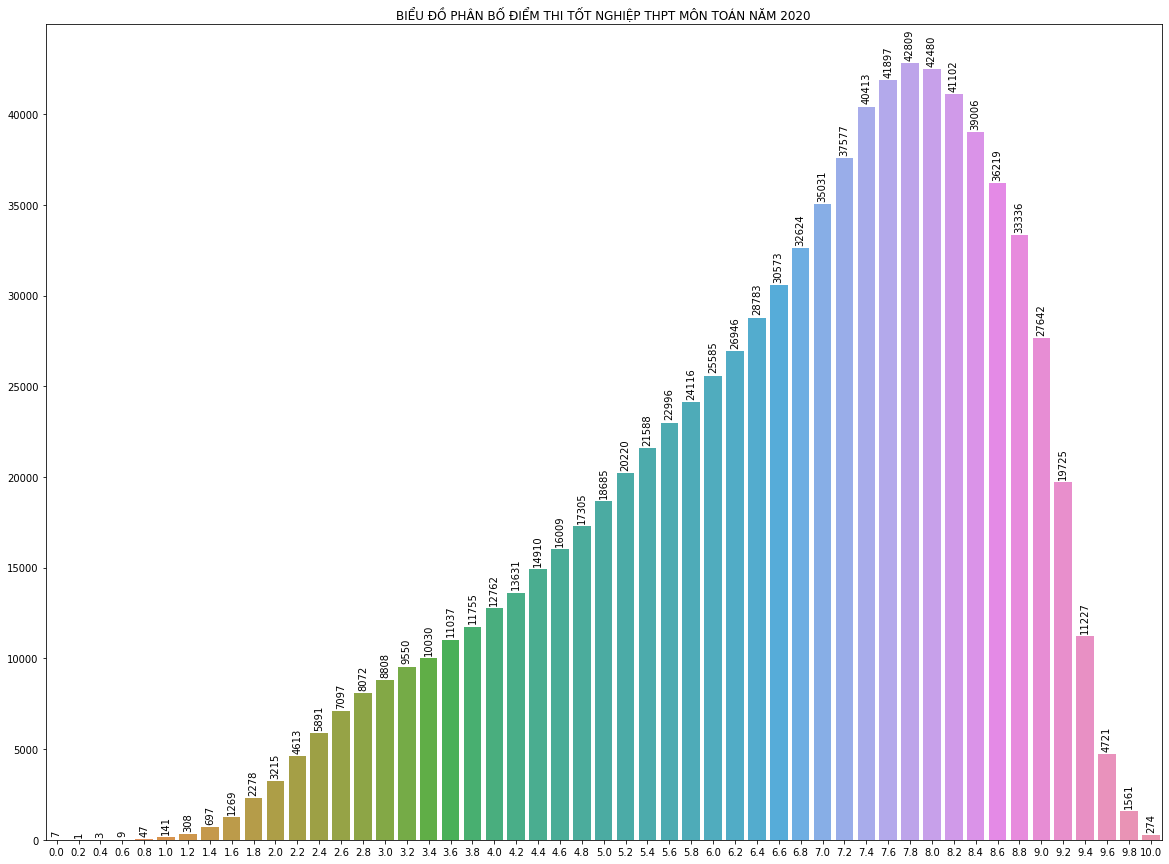

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Toán của cả nước năm 2020 cho thấy: Có 866581 thí sinh tham gia thi bài thi Toán trong đó điểm trung bình là 6.66 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.80 điểm. Số thí sinh có điểm <= 1 là 208 (chiếm tỉ lệ 0.024%); số thí sinh dưới trung bình là 159445 (chiếm tỉ lệ 18.399%); có 274 thí sinh đạt điểm 10.


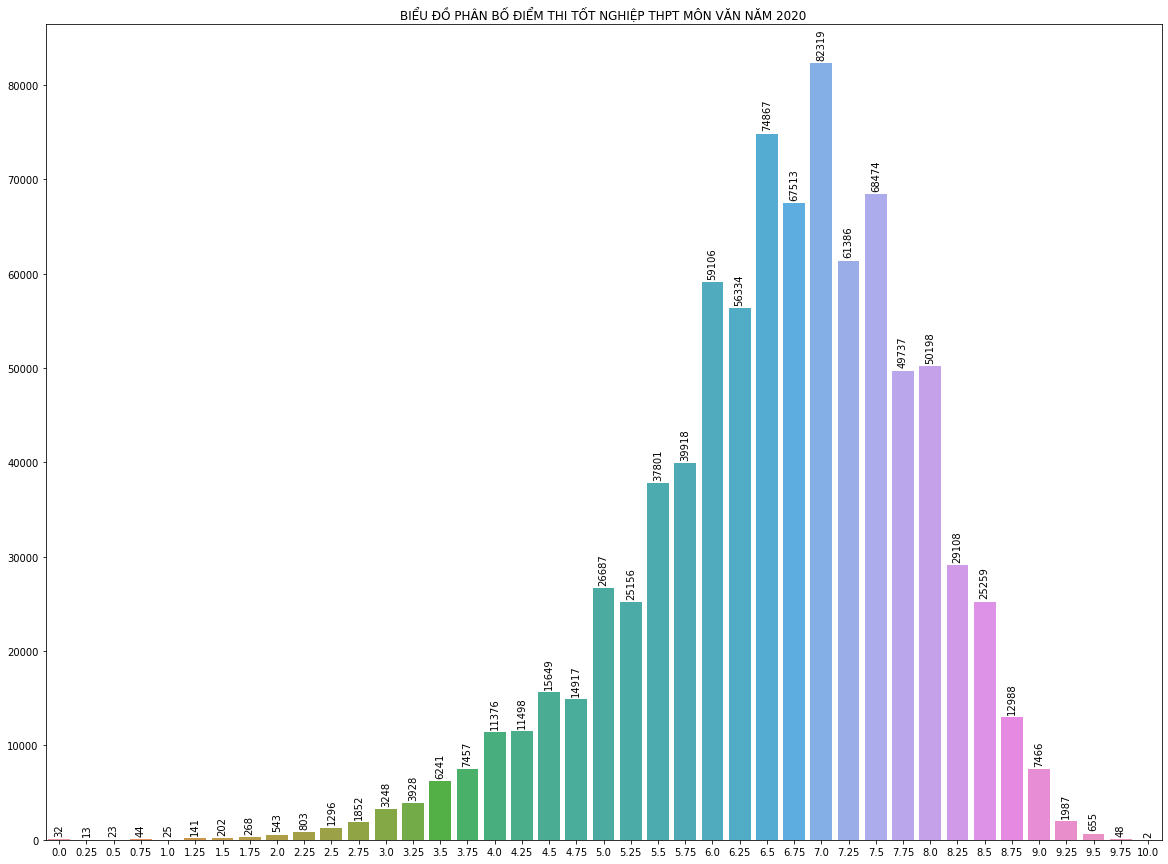

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Văn của cả nước năm 2020 cho thấy: Có 856565 thí sinh tham gia thi bài thi Văn trong đó điểm trung bình là 6.60 điểm, điểm trung vị là 6.75 điểm, điểm số có nhiều thí sinh đạt nhất là 7.00 điểm. Số thí sinh có điểm <= 1 là 137 (chiếm tỉ lệ 0.016%); số thí sinh dưới trung bình là 79556 (chiếm tỉ lệ 9.288%); có 2 thí sinh đạt điểm 10.


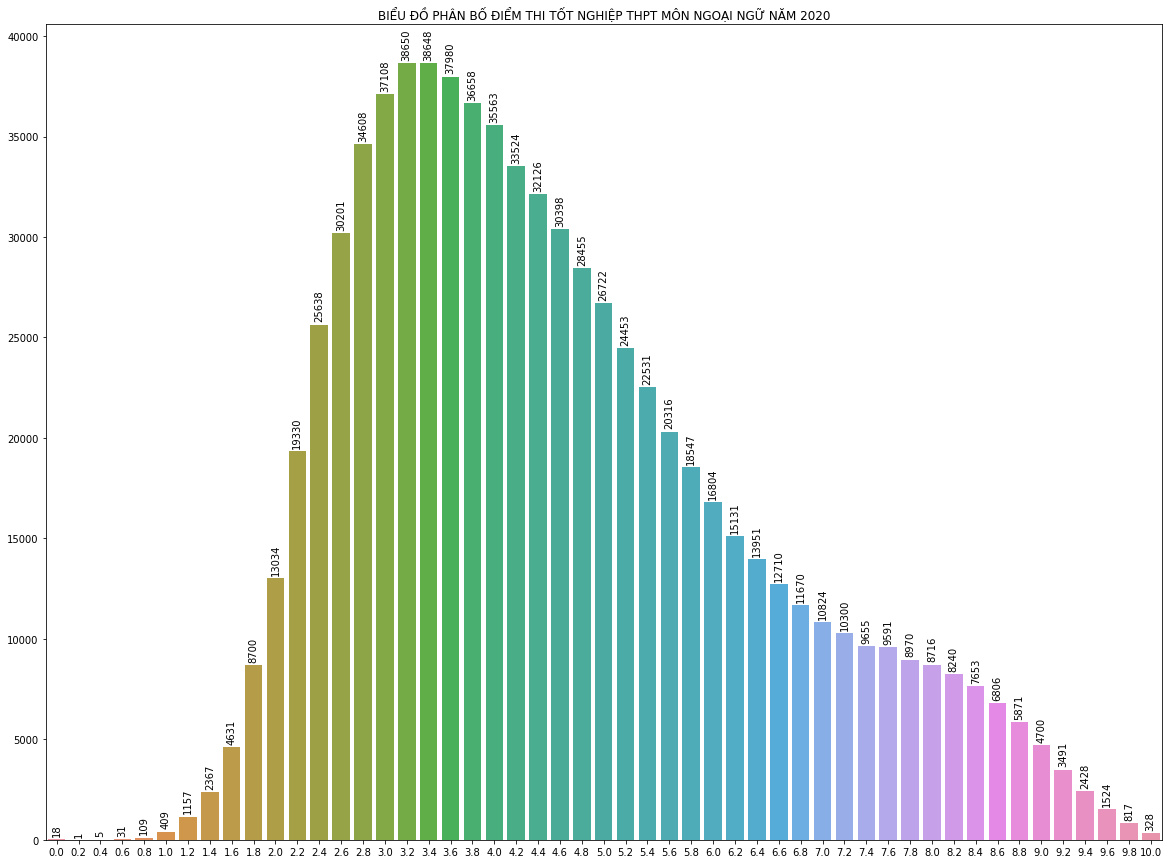

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Ngoại ngữ của cả nước năm 2020 cho thấy: Có 772098 thí sinh tham gia thi bài thi Ngoại ngữ trong đó điểm trung bình là 4.57 điểm, điểm trung vị là 4.20 điểm, điểm số có nhiều thí sinh đạt nhất là 3.20 điểm. Số thí sinh có điểm <= 1 là 573 (chiếm tỉ lệ 0.074%); số thí sinh dưới trung bình là 489349 (chiếm tỉ lệ 63.379%); có 328 thí sinh đạt điểm 10.


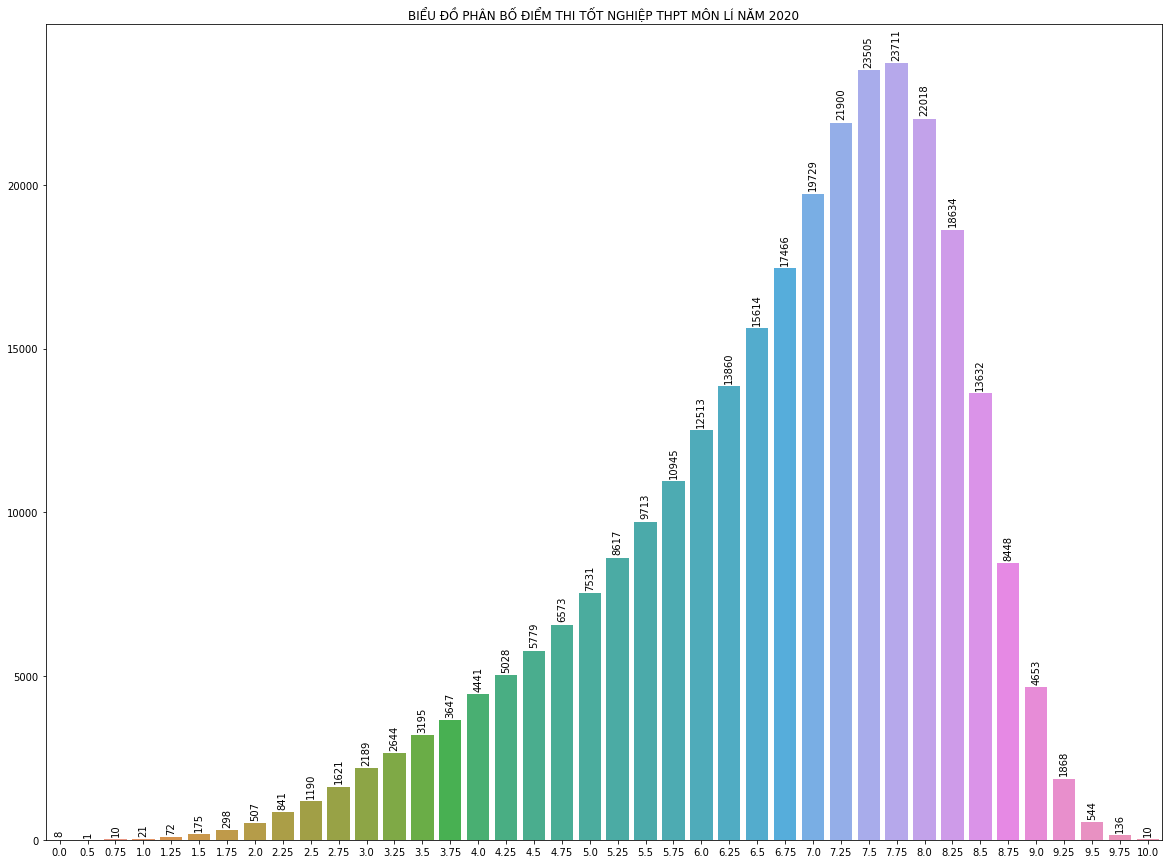

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Lí của cả nước năm 2020 cho thấy: Có 293287 thí sinh tham gia thi bài thi Lí trong đó điểm trung bình là 6.72 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.75 điểm. Số thí sinh có điểm <= 1 là 40 (chiếm tỉ lệ 0.014%); số thí sinh dưới trung bình là 38240 (chiếm tỉ lệ 13.038%); có 10 thí sinh đạt điểm 10.


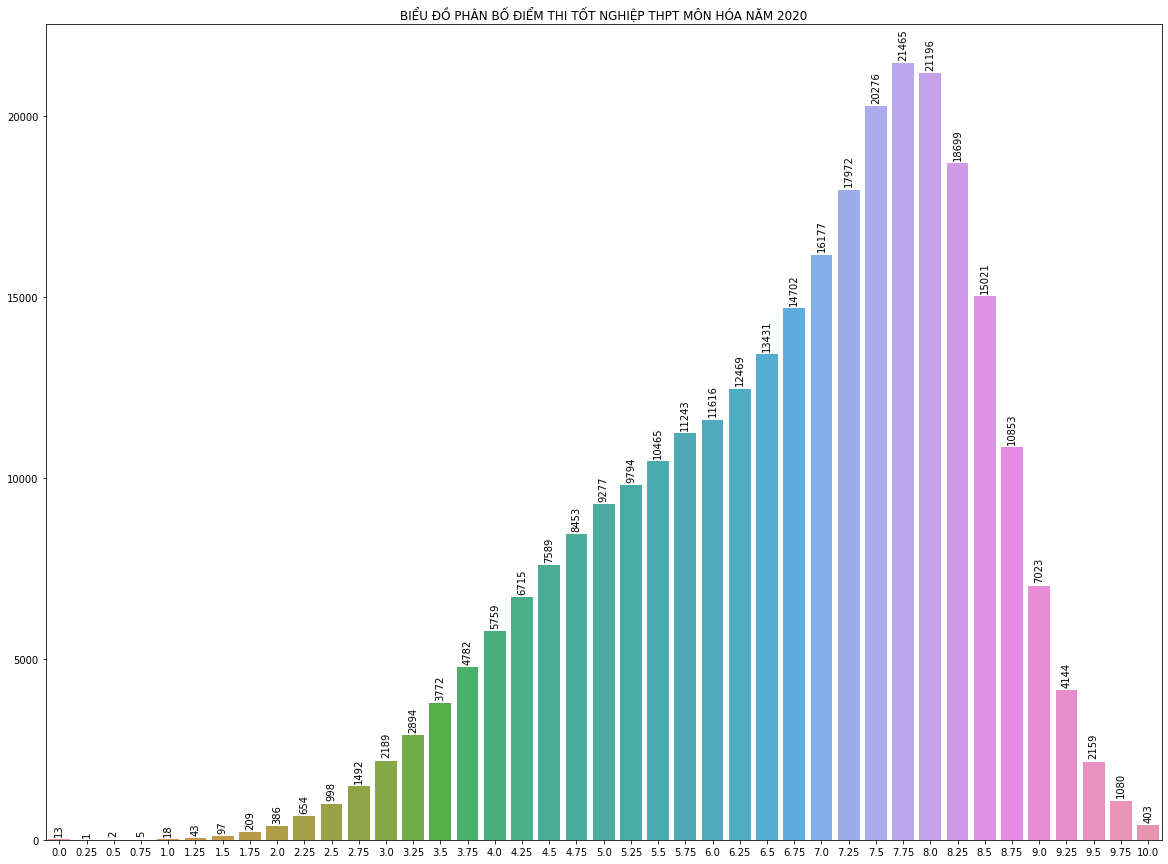

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Hóa của cả nước năm 2020 cho thấy: Có 295536 thí sinh tham gia thi bài thi Hóa trong đó điểm trung bình là 6.71 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.75 điểm. Số thí sinh có điểm <= 1 là 39 (chiếm tỉ lệ 0.013%); số thí sinh dưới trung bình là 46071 (chiếm tỉ lệ 15.589%); có 403 thí sinh đạt điểm 10.


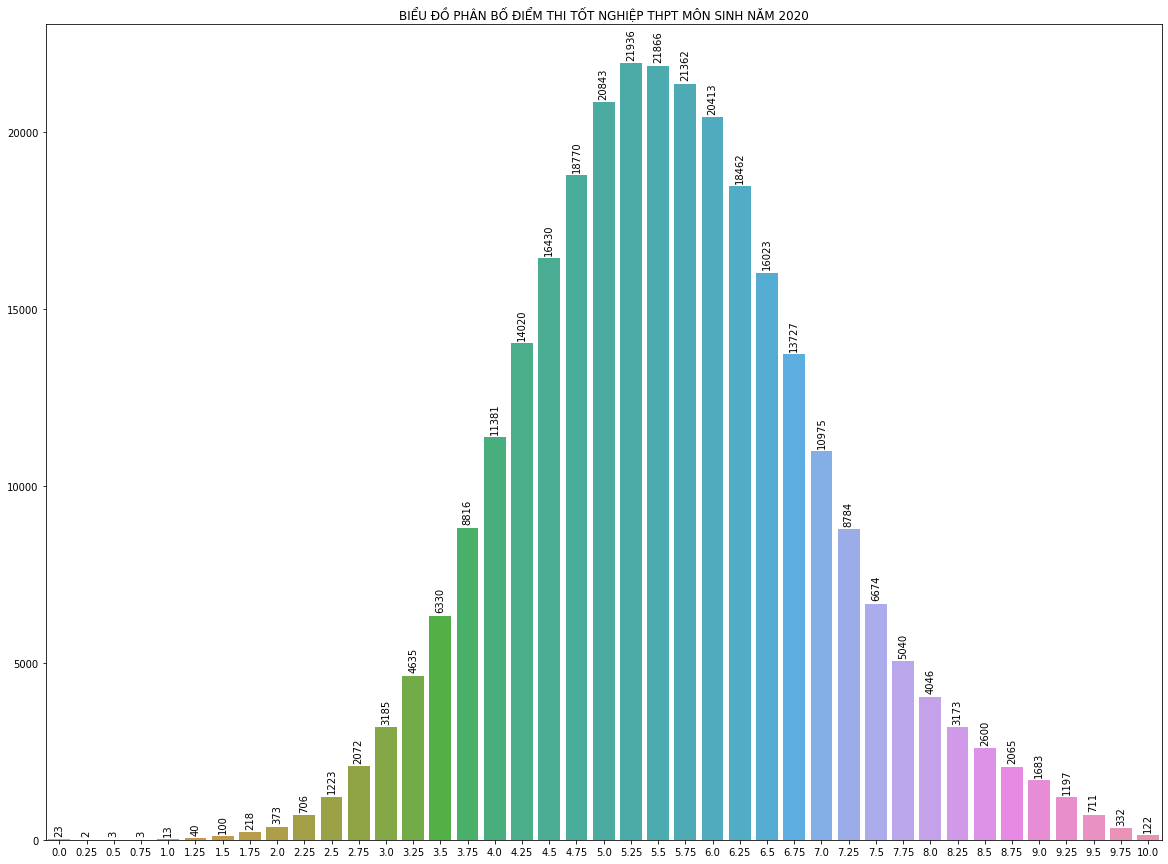

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Sinh của cả nước năm 2020 cho thấy: Có 290377 thí sinh tham gia thi bài thi Sinh trong đó điểm trung bình là 5.59 điểm, điểm trung vị là 5.50 điểm, điểm số có nhiều thí sinh đạt nhất là 5.25 điểm. Số thí sinh có điểm <= 1 là 44 (chiếm tỉ lệ 0.015%); số thí sinh dưới trung bình là 88343 (chiếm tỉ lệ 30.424%); có 122 thí sinh đạt điểm 10.


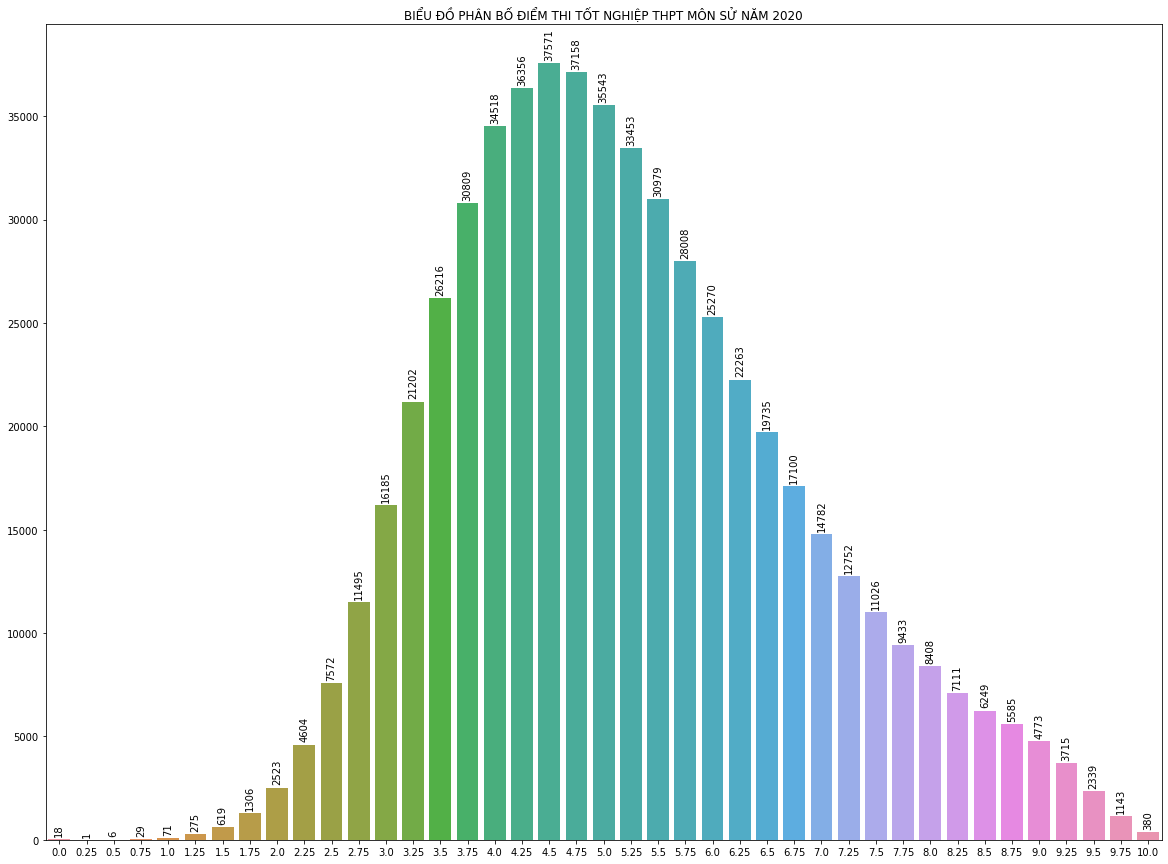

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Sử của cả nước năm 2020 cho thấy: Có 568581 thí sinh tham gia thi bài thi Sử trong đó điểm trung bình là 5.18 điểm, điểm trung vị là 5.00 điểm, điểm số có nhiều thí sinh đạt nhất là 4.50 điểm. Số thí sinh có điểm <= 1 là 125 (chiếm tỉ lệ 0.022%); số thí sinh dưới trung bình là 268534 (chiếm tỉ lệ 47.229%); có 380 thí sinh đạt điểm 10.


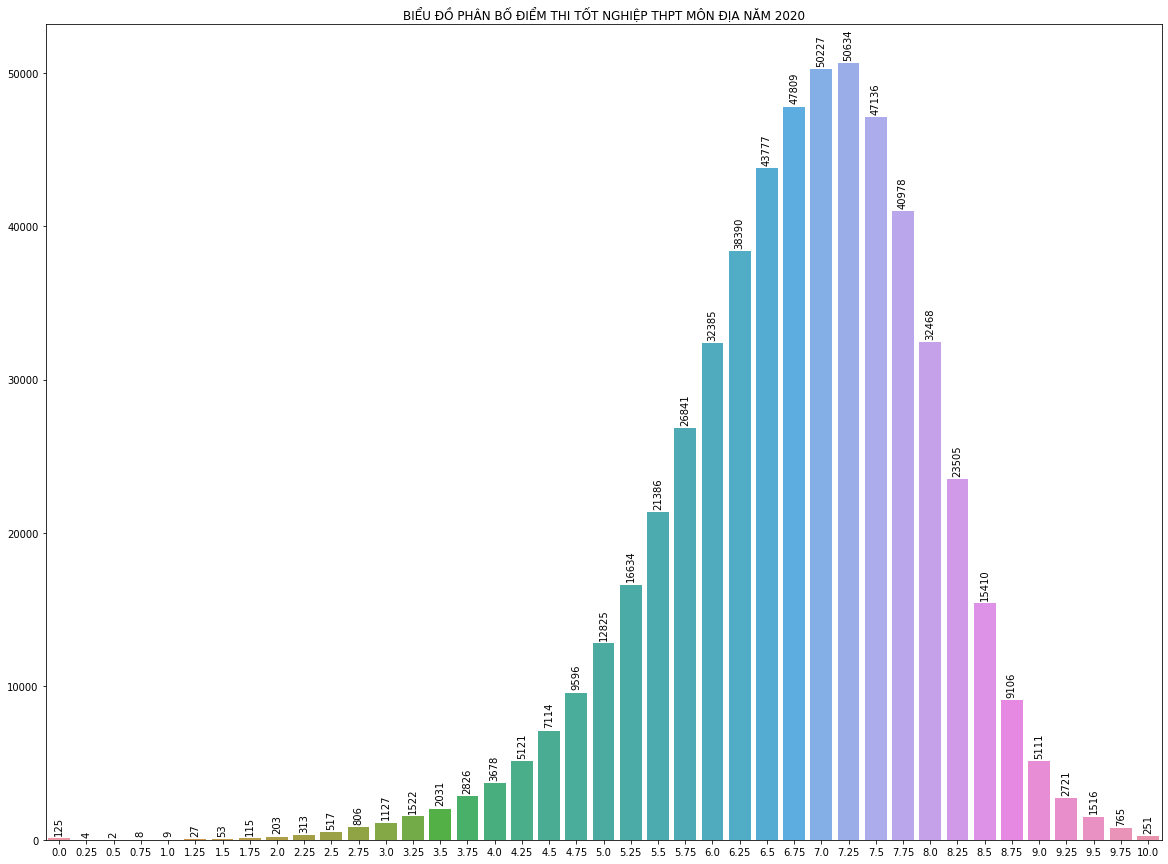

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Địa của cả nước năm 2020 cho thấy: Có 555072 thí sinh tham gia thi bài thi Địa trong đó điểm trung bình là 6.77 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.25 điểm. Số thí sinh có điểm <= 1 là 148 (chiếm tỉ lệ 0.027%); số thí sinh dưới trung bình là 35197 (chiếm tỉ lệ 6.341%); có 251 thí sinh đạt điểm 10.


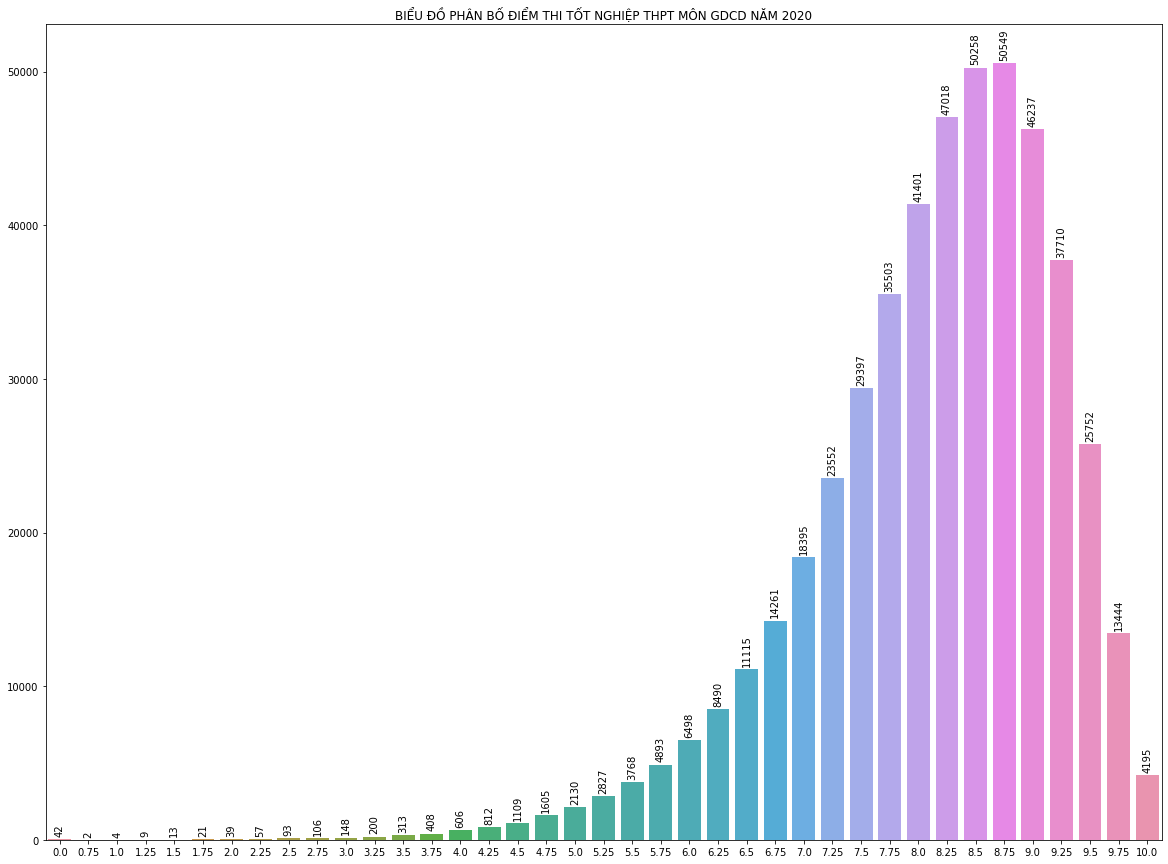

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn GDCD của cả nước năm 2020 cho thấy: Có 482980 thí sinh tham gia thi bài thi GDCD trong đó điểm trung bình là 8.13 điểm, điểm trung vị là 8.25 điểm, điểm số có nhiều thí sinh đạt nhất là 8.75 điểm. Số thí sinh có điểm <= 1 là 48 (chiếm tỉ lệ 0.010%); số thí sinh dưới trung bình là 5587 (chiếm tỉ lệ 1.157%); có 4195 thí sinh đạt điểm 10.


In [82]:
# draw histogram for each subject using seaborn histogram
for subject in SUBJECT_NAMES:
	fig, ax = plt.subplots(figsize=(20, 15))
	sns.barplot(data=grade_dict[subject], x='grade', y='count', ax=ax)
	ax.set_title(f'BIỂU ĐỒ PHÂN BỐ ĐIỂM THI TỐT NGHIỆP THPT MÔN {subject.upper()} NĂM {year}')
	ax.set_xlabel(None)
	ax.set_ylabel(None)
	ax.bar_label(ax.containers[0], rotation=90, padding=3)
	plt.show()
	analyze(grade_dict[subject], subject, year)

Tiến hành tương tự với năm 2021.

In [83]:
year = '2021'
grade_dict = {}
for subject in SUBJECT_NAMES:
	grade_dict[subject] = grade_df[year][subject].dropna()
	grade_dict[subject] = grade_dict[subject].value_counts().sort_index()
	grade_dict[subject] = grade_dict[subject].rename_axis('grade').reset_index(name='count')

grade_dict['Văn'].head(10)

,grade,count
0,0.00,26
1,0.25,10
2,0.50,44
3,0.75,64
4,1.00,23
5,1.17,1
6,1.25,554
7,1.50,795
8,1.67,1
9,1.75,940


In [84]:
grade_dict['Văn']['grade'] = grade_dict['Văn']['grade'].apply(round_to_025)
grade_dict['Văn'] = grade_dict['Văn'].groupby('grade').sum().reset_index()
grade_dict['Văn'].head(10)

,grade,count
0,0.00,26
1,0.25,10
2,0.50,44
3,0.75,64
4,1.00,23
5,1.25,555
6,1.50,795
7,1.75,941
8,2.00,1612
9,2.25,1828


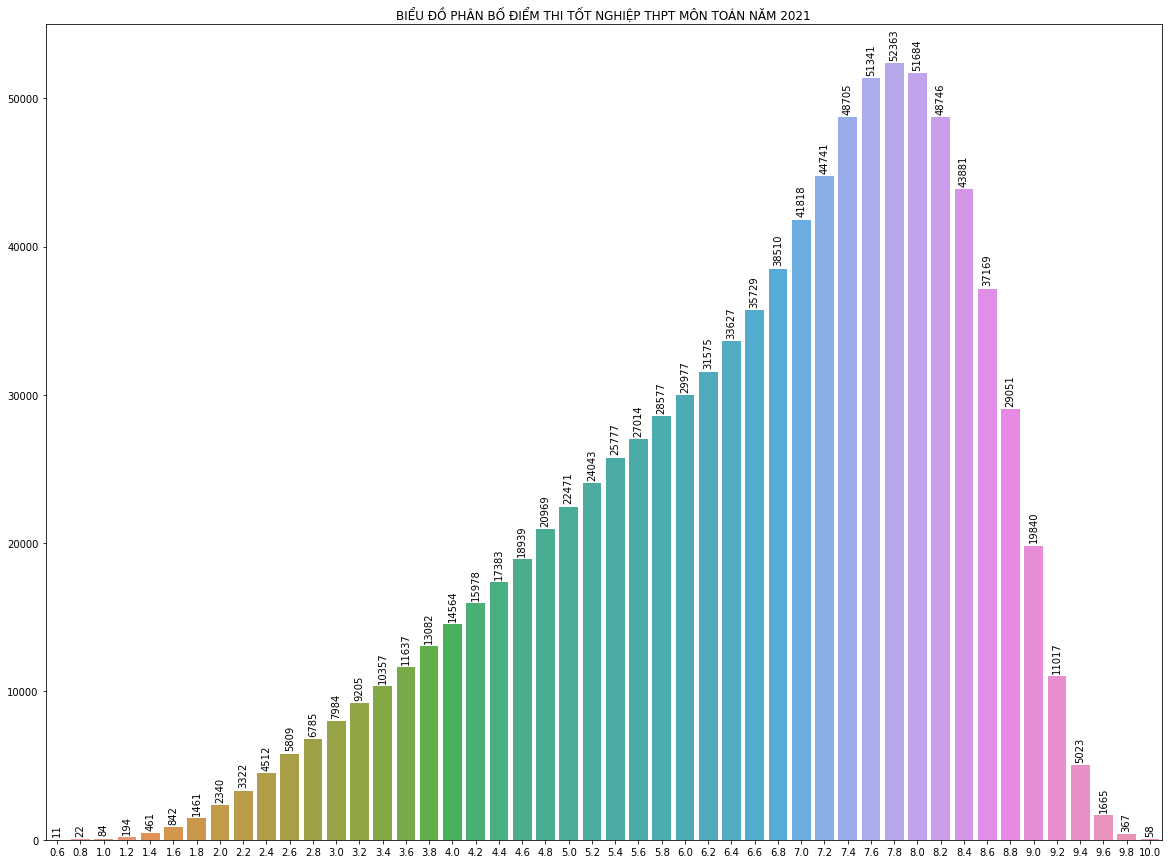

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Toán của cả nước năm 2021 cho thấy: Có 950710 thí sinh tham gia thi bài thi Toán trong đó điểm trung bình là 6.62 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.80 điểm. Số thí sinh có điểm <= 1 là 117 (chiếm tỉ lệ 0.012%); số thí sinh dưới trung bình là 165941 (chiếm tỉ lệ 17.454%); có 58 thí sinh đạt điểm 10.


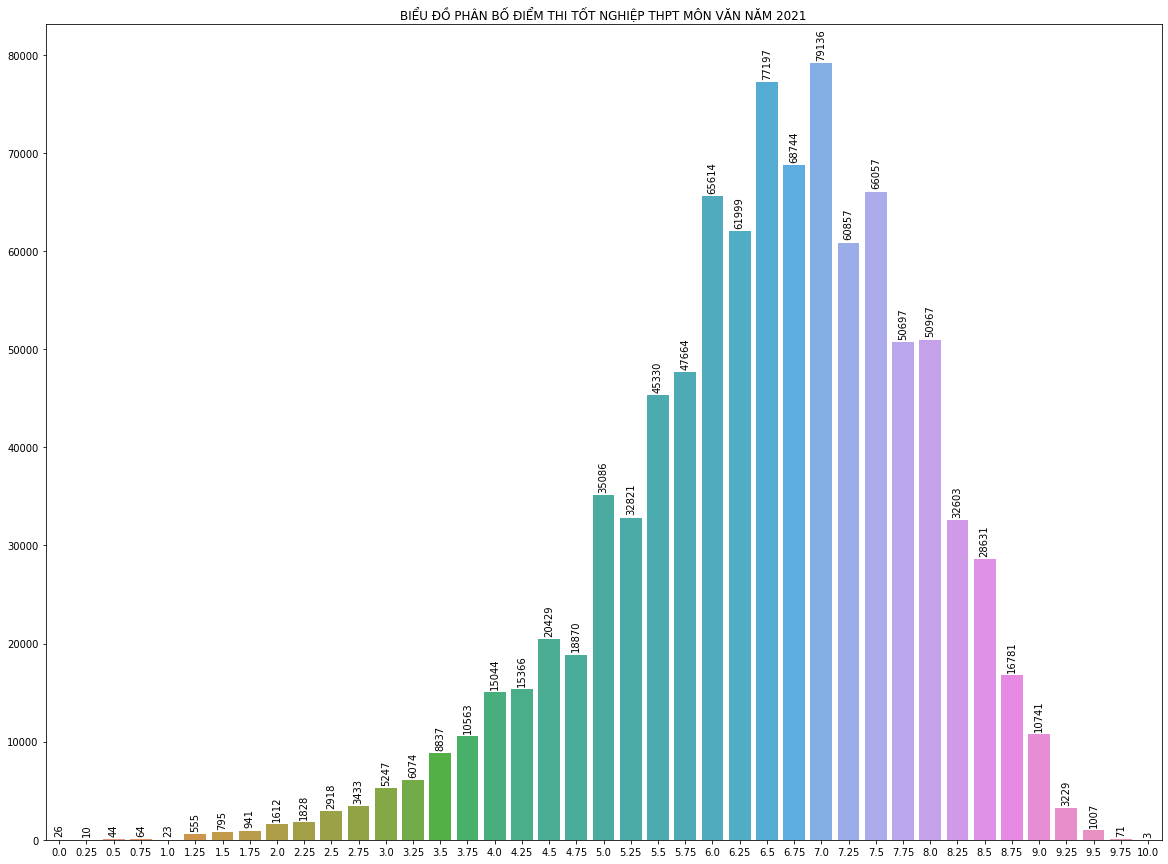

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Văn của cả nước năm 2021 cho thấy: Có 947914 thí sinh tham gia thi bài thi Văn trong đó điểm trung bình là 6.48 điểm, điểm trung vị là 6.50 điểm, điểm số có nhiều thí sinh đạt nhất là 7.00 điểm. Số thí sinh có điểm <= 1 là 167 (chiếm tỉ lệ 0.018%); số thí sinh dưới trung bình là 112679 (chiếm tỉ lệ 11.887%); có 3 thí sinh đạt điểm 10.


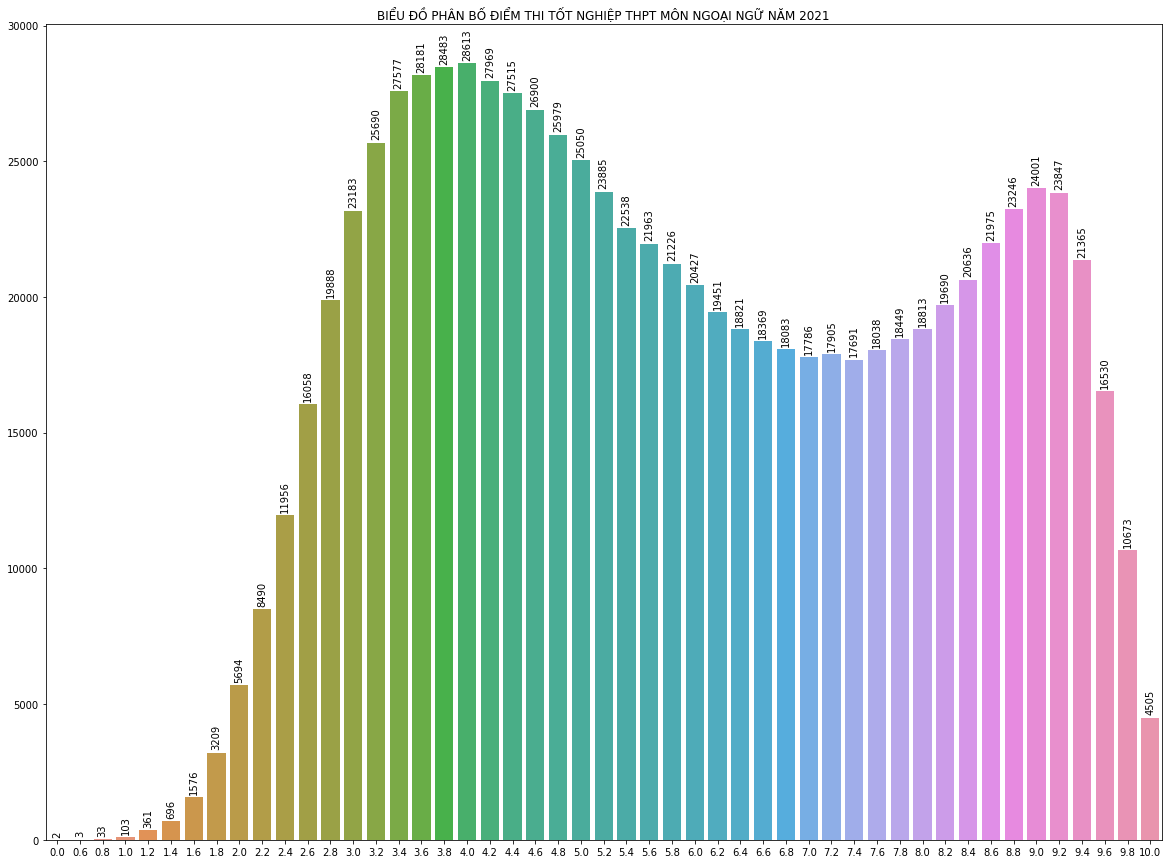

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Ngoại ngữ của cả nước năm 2021 cho thấy: Có 843122 thí sinh tham gia thi bài thi Ngoại ngữ trong đó điểm trung bình là 5.86 điểm, điểm trung vị là 5.60 điểm, điểm số có nhiều thí sinh đạt nhất là 4.00 điểm. Số thí sinh có điểm <= 1 là 141 (chiếm tỉ lệ 0.017%); số thí sinh dưới trung bình là 338159 (chiếm tỉ lệ 40.108%); có 4505 thí sinh đạt điểm 10.


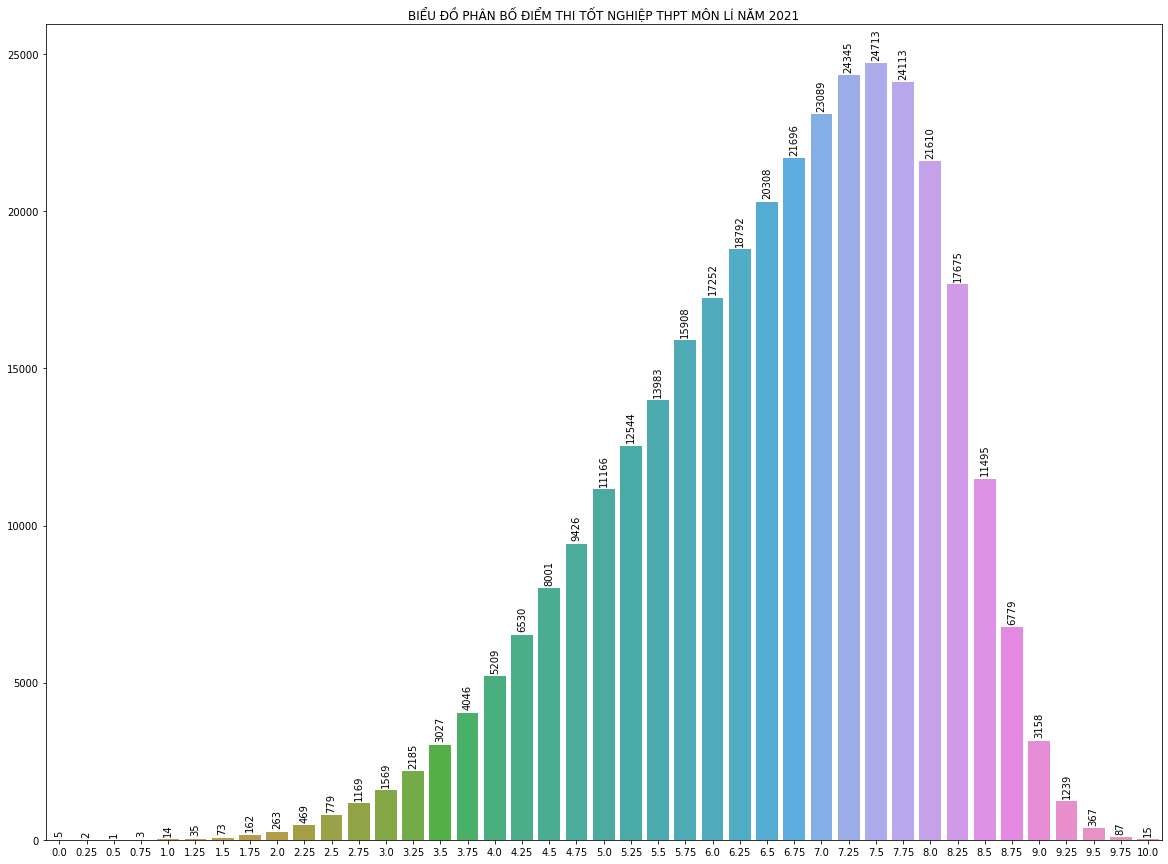

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Lí của cả nước năm 2021 cho thấy: Có 333302 thí sinh tham gia thi bài thi Lí trong đó điểm trung bình là 6.58 điểm, điểm trung vị là 6.75 điểm, điểm số có nhiều thí sinh đạt nhất là 7.50 điểm. Số thí sinh có điểm <= 1 là 25 (chiếm tỉ lệ 0.008%); số thí sinh dưới trung bình là 42968 (chiếm tỉ lệ 12.892%); có 15 thí sinh đạt điểm 10.


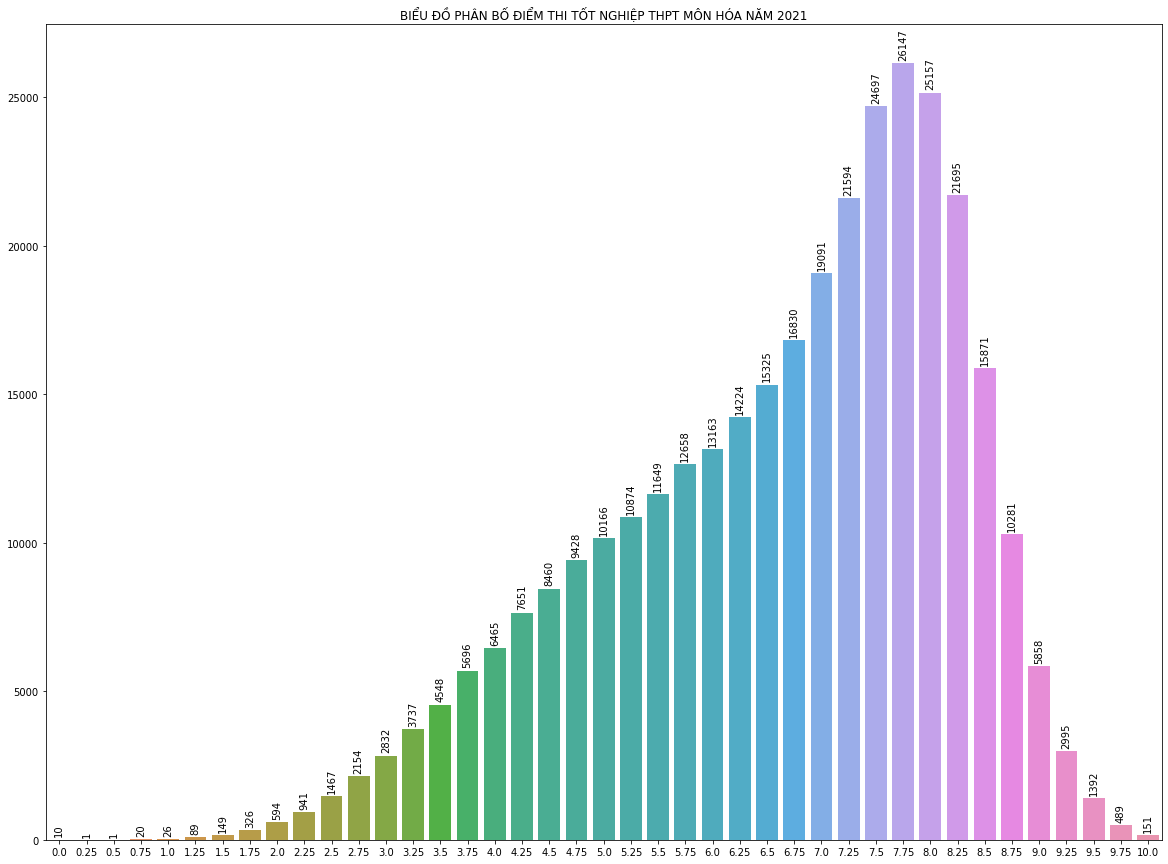

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Hóa của cả nước năm 2021 cho thấy: Có 334902 thí sinh tham gia thi bài thi Hóa trong đó điểm trung bình là 6.63 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.75 điểm. Số thí sinh có điểm <= 1 là 58 (chiếm tỉ lệ 0.017%); số thí sinh dưới trung bình là 54595 (chiếm tỉ lệ 16.302%); có 151 thí sinh đạt điểm 10.


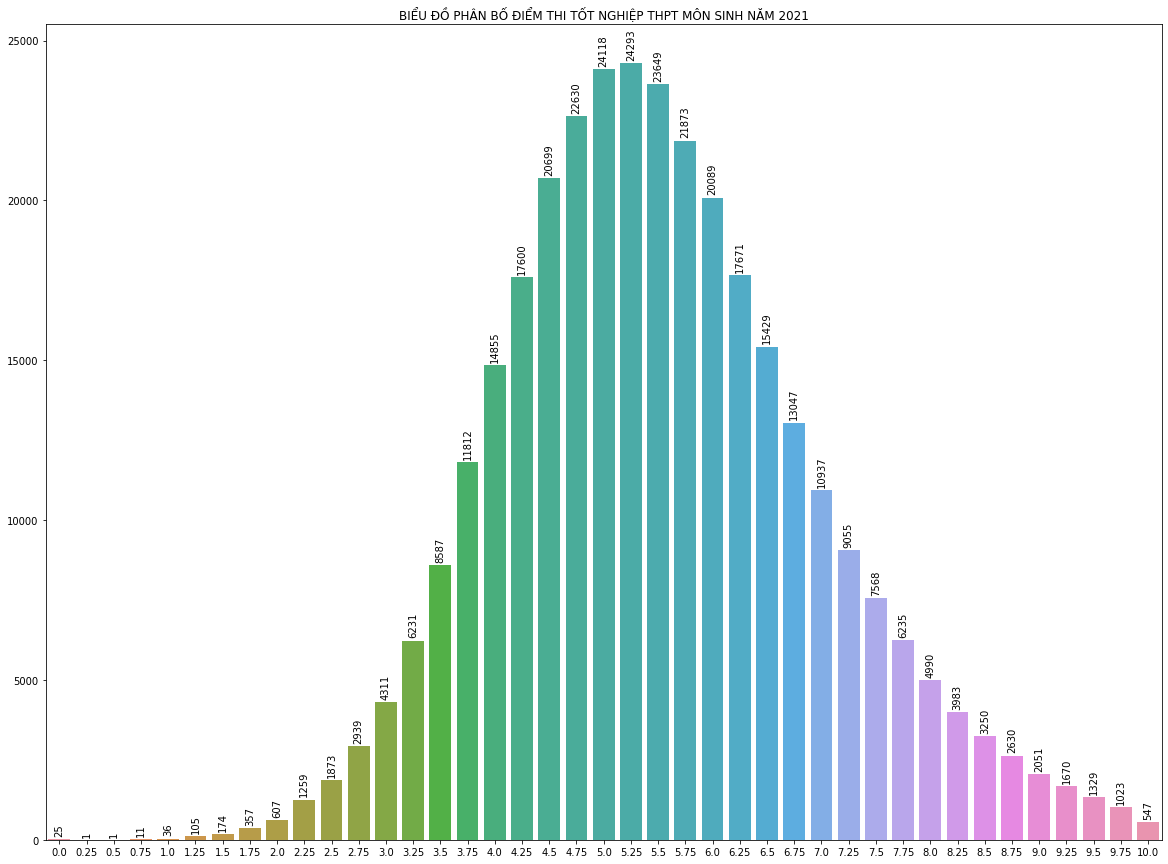

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Sinh của cả nước năm 2021 cho thấy: Có 329550 thí sinh tham gia thi bài thi Sinh trong đó điểm trung bình là 5.51 điểm, điểm trung vị là 5.50 điểm, điểm số có nhiều thí sinh đạt nhất là 5.25 điểm. Số thí sinh có điểm <= 1 là 74 (chiếm tỉ lệ 0.022%); số thí sinh dưới trung bình là 114113 (chiếm tỉ lệ 34.627%); có 547 thí sinh đạt điểm 10.


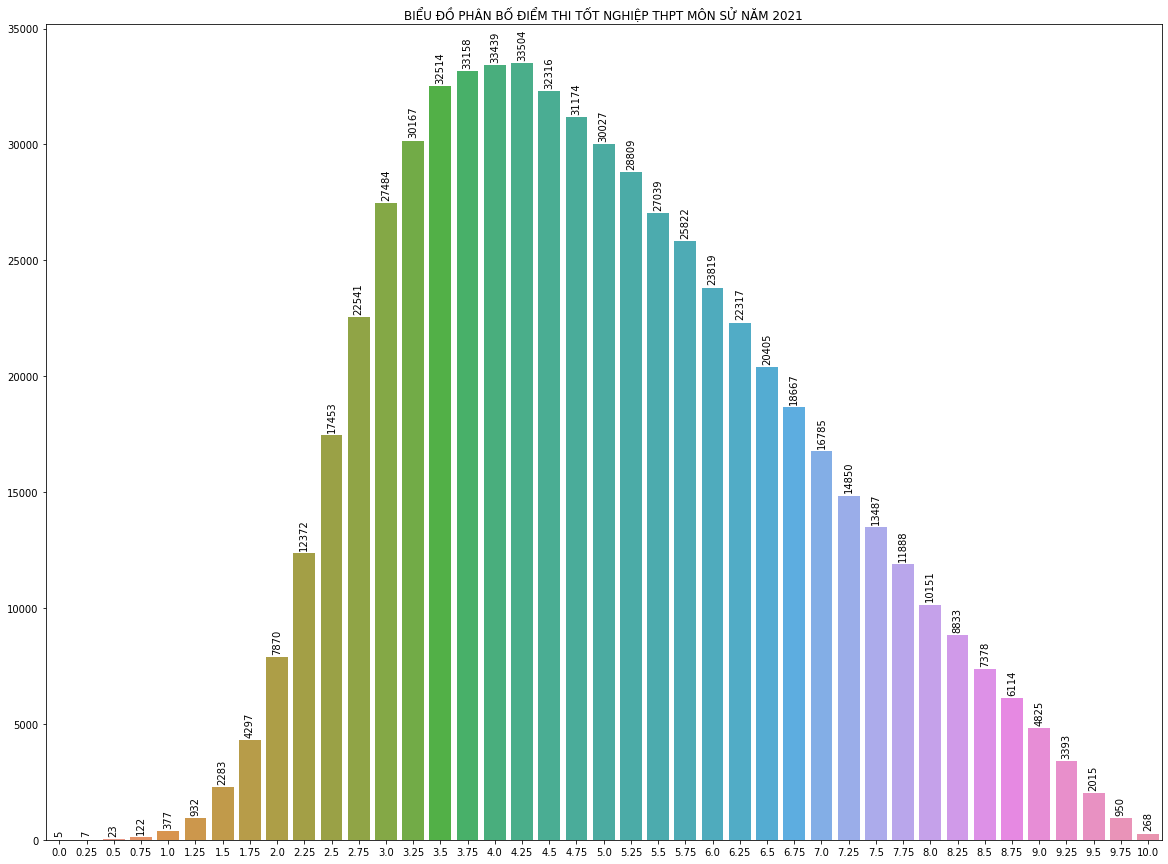

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Sử của cả nước năm 2021 cho thấy: Có 619880 thí sinh tham gia thi bài thi Sử trong đó điểm trung bình là 4.98 điểm, điểm trung vị là 4.75 điểm, điểm số có nhiều thí sinh đạt nhất là 4.25 điểm. Số thí sinh có điểm <= 1 là 534 (chiếm tỉ lệ 0.086%); số thí sinh dưới trung bình là 322038 (chiếm tỉ lệ 51.952%); có 268 thí sinh đạt điểm 10.


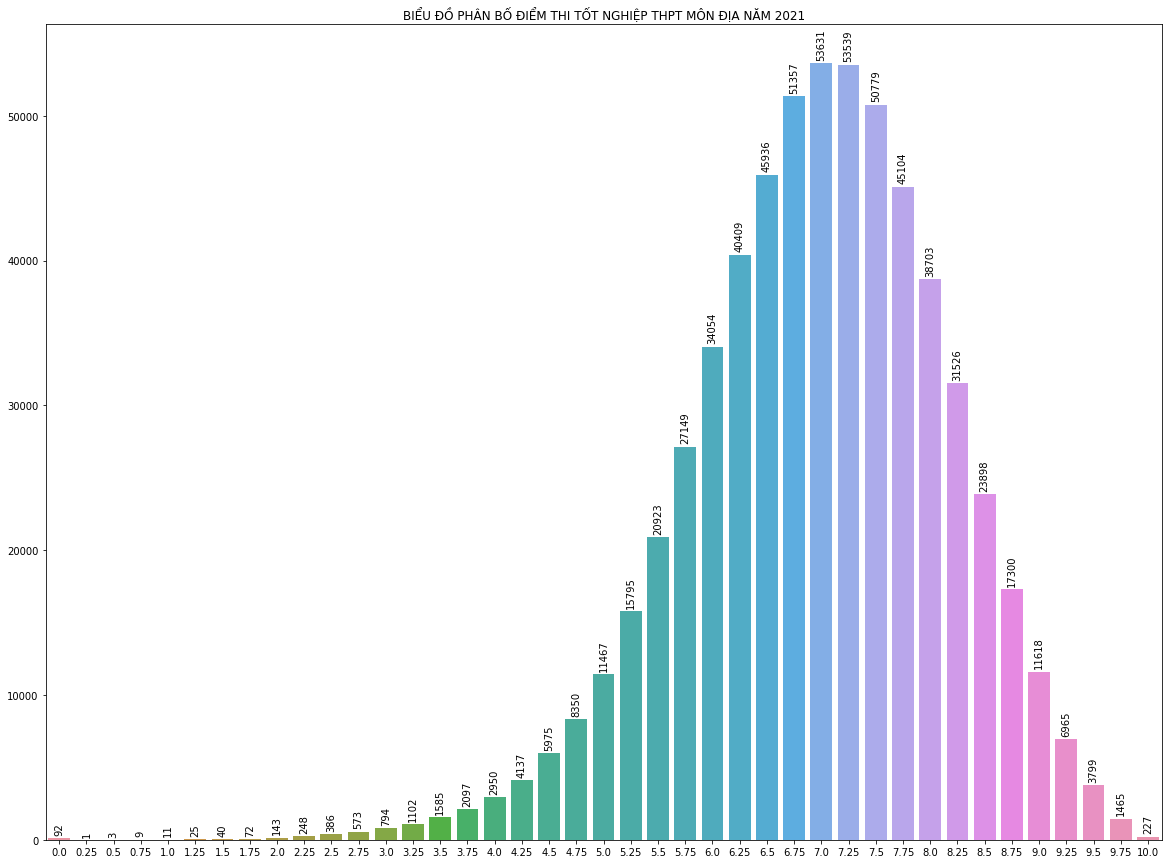

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Địa của cả nước năm 2021 cho thấy: Có 614237 thí sinh tham gia thi bài thi Địa trong đó điểm trung bình là 6.96 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.00 điểm. Số thí sinh có điểm <= 1 là 116 (chiếm tỉ lệ 0.019%); số thí sinh dưới trung bình là 28593 (chiếm tỉ lệ 4.655%); có 227 thí sinh đạt điểm 10.


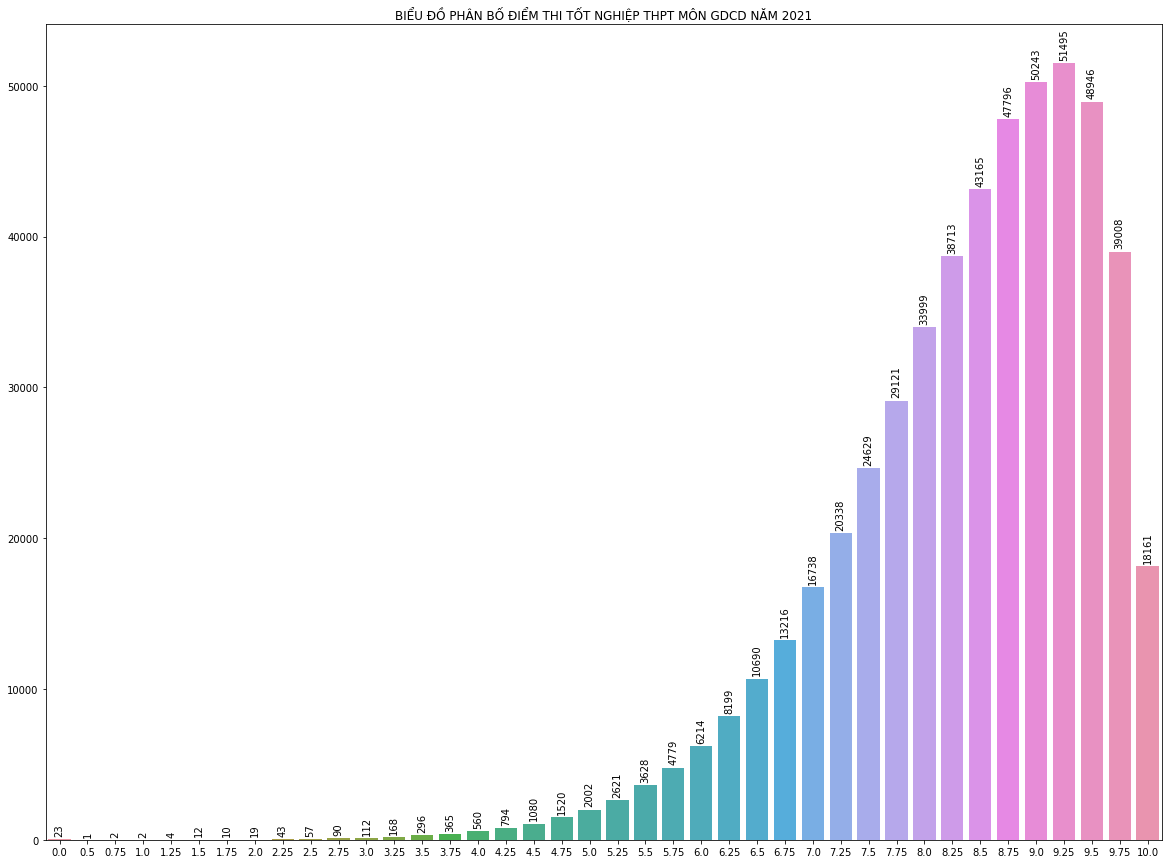

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn GDCD của cả nước năm 2021 cho thấy: Có 518859 thí sinh tham gia thi bài thi GDCD trong đó điểm trung bình là 8.38 điểm, điểm trung vị là 8.50 điểm, điểm số có nhiều thí sinh đạt nhất là 9.25 điểm. Số thí sinh có điểm <= 1 là 28 (chiếm tỉ lệ 0.005%); số thí sinh dưới trung bình là 5158 (chiếm tỉ lệ 0.994%); có 18161 thí sinh đạt điểm 10.


In [85]:
# draw histogram for each subject using seaborn histogram
for subject in SUBJECT_NAMES:
	fig, ax = plt.subplots(figsize=(20, 15))
	sns.barplot(data=grade_dict[subject], x='grade', y='count', ax=ax)
	ax.set_title(f'BIỂU ĐỒ PHÂN BỐ ĐIỂM THI TỐT NGHIỆP THPT MÔN {subject.upper()} NĂM {year}')
	ax.set_xlabel(None)
	ax.set_ylabel(None)
	ax.bar_label(ax.containers[0], rotation=90, padding=3)
	plt.show()
	analyze(grade_dict[subject], subject, year)

Cuối cùng là năm 2022.

In [86]:
year = '2022'
grade_dict = {}
for subject in SUBJECT_NAMES:
	grade_dict[subject] = grade_df[year][subject].dropna()
	grade_dict[subject] = grade_dict[subject].value_counts().sort_index()
	grade_dict[subject] = grade_dict[subject].rename_axis('grade').reset_index(name='count')
	
grade_dict['Văn'].head(10)

,grade,count
0,0.00,38
1,0.25,12
2,0.50,51
3,0.75,65
4,1.00,28
5,1.25,394
6,1.33,1
7,1.50,610
8,1.75,694
9,1.92,1


In [87]:
grade_dict['Văn']['grade'] = grade_dict['Văn']['grade'].apply(round_to_025)
grade_dict['Văn'] = grade_dict['Văn'].groupby('grade').sum().reset_index()
grade_dict['Văn'].head(10)

,grade,count
0,0.00,38
1,0.25,12
2,0.50,51
3,0.75,65
4,1.00,28
5,1.25,395
6,1.50,610
7,1.75,694
8,2.00,1262
9,2.25,1520


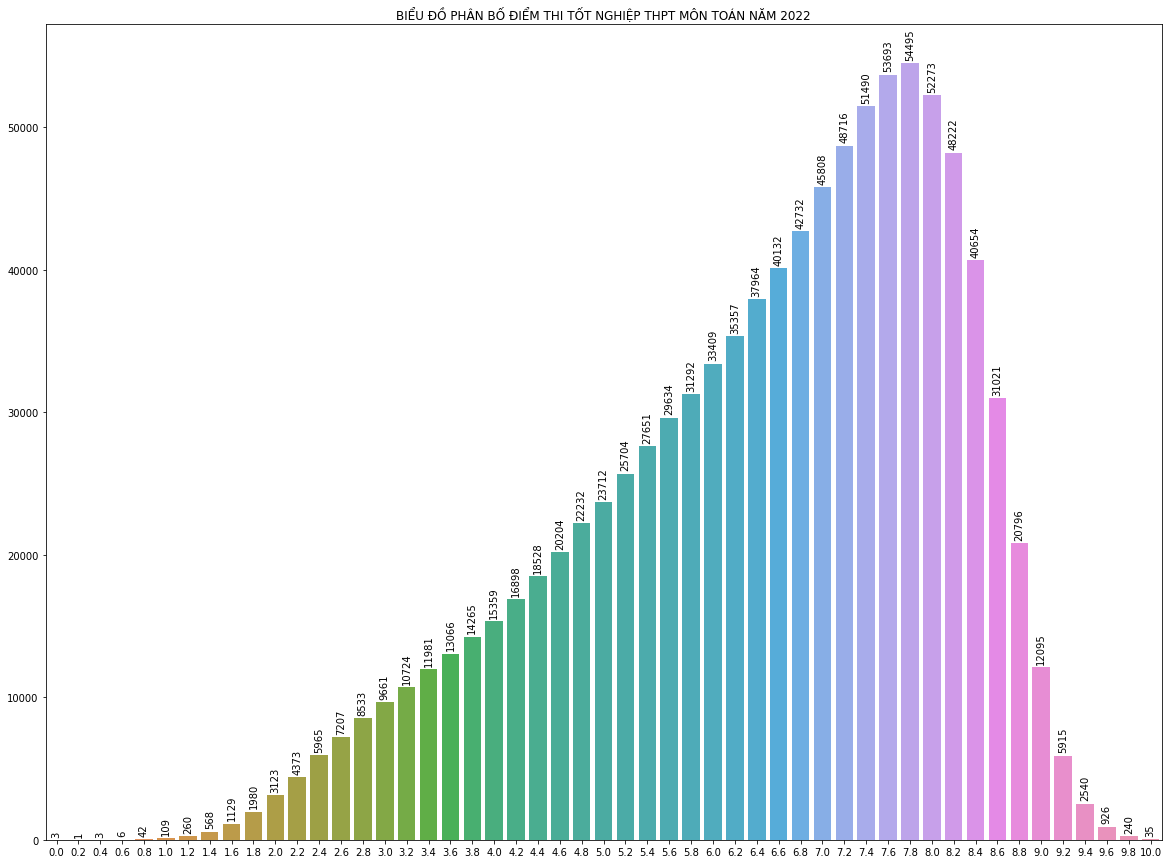

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Toán của cả nước năm 2022 cho thấy: Có 982726 thí sinh tham gia thi bài thi Toán trong đó điểm trung bình là 6.47 điểm, điểm trung vị là 6.80 điểm, điểm số có nhiều thí sinh đạt nhất là 7.80 điểm. Số thí sinh có điểm <= 1 là 164 (chiếm tỉ lệ 0.017%); số thí sinh dưới trung bình là 186220 (chiếm tỉ lệ 18.949%); có 35 thí sinh đạt điểm 10.


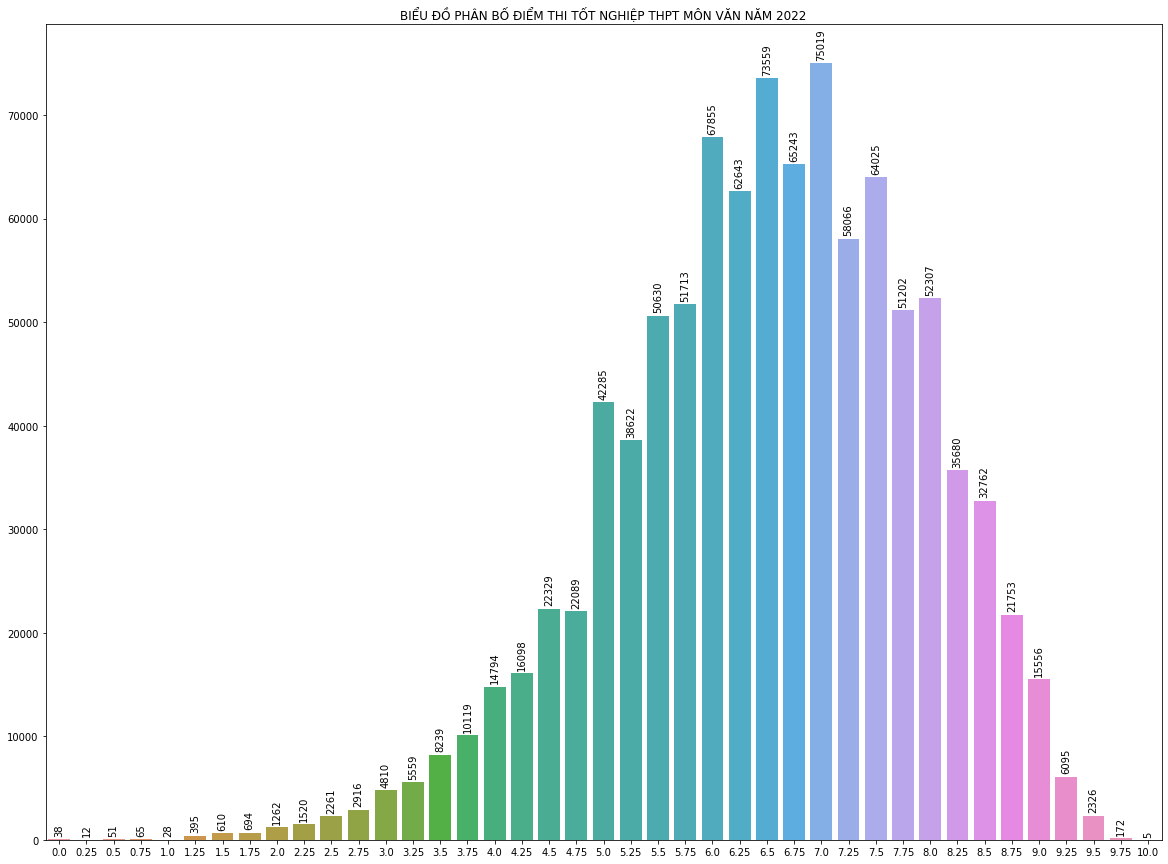

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Văn của cả nước năm 2022 cho thấy: Có 981407 thí sinh tham gia thi bài thi Văn trong đó điểm trung bình là 6.51 điểm, điểm trung vị là 6.50 điểm, điểm số có nhiều thí sinh đạt nhất là 7.00 điểm. Số thí sinh có điểm <= 1 là 194 (chiếm tỉ lệ 0.020%); số thí sinh dưới trung bình là 113889 (chiếm tỉ lệ 11.605%); có 5 thí sinh đạt điểm 10.


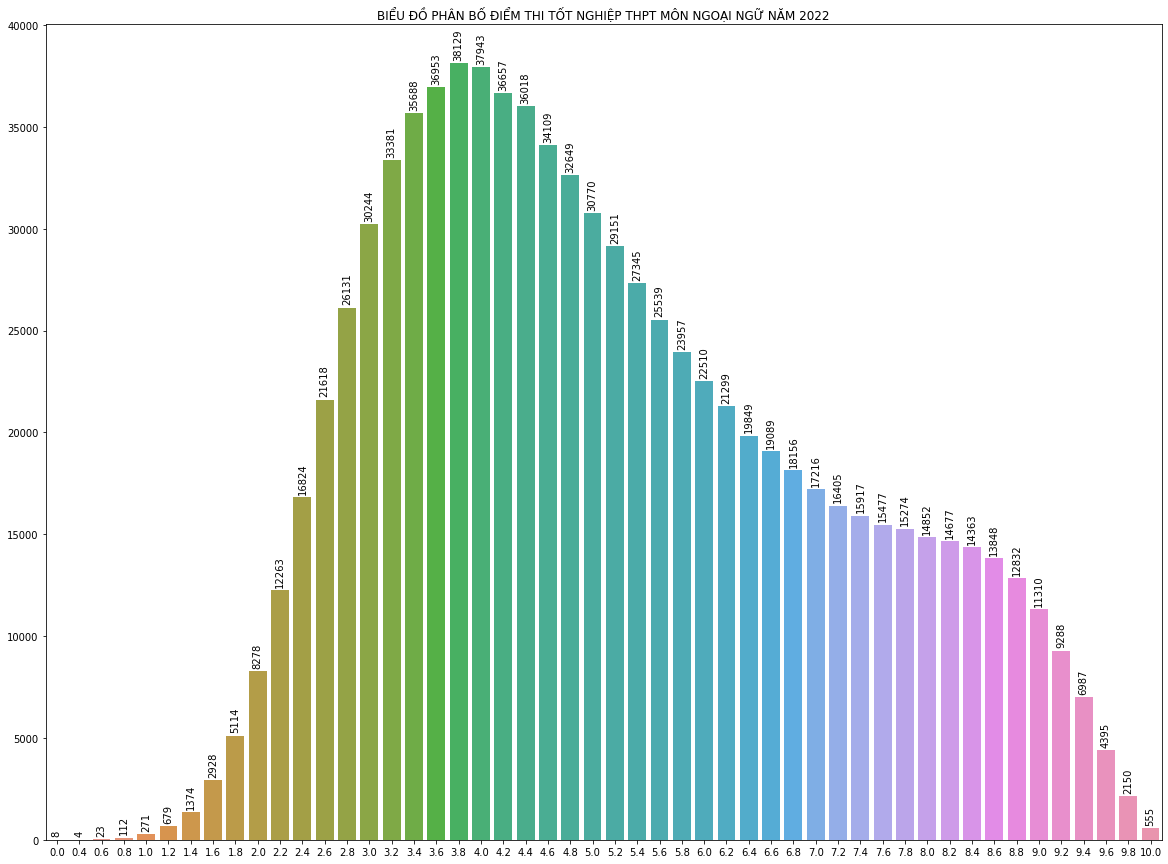

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Ngoại ngữ của cả nước năm 2022 cho thấy: Có 870609 thí sinh tham gia thi bài thi Ngoại ngữ trong đó điểm trung bình là 5.16 điểm, điểm trung vị là 4.80 điểm, điểm số có nhiều thí sinh đạt nhất là 3.80 điểm. Số thí sinh có điểm <= 1 là 418 (chiếm tỉ lệ 0.048%); số thí sinh dưới trung bình là 447398 (chiếm tỉ lệ 51.389%); có 555 thí sinh đạt điểm 10.


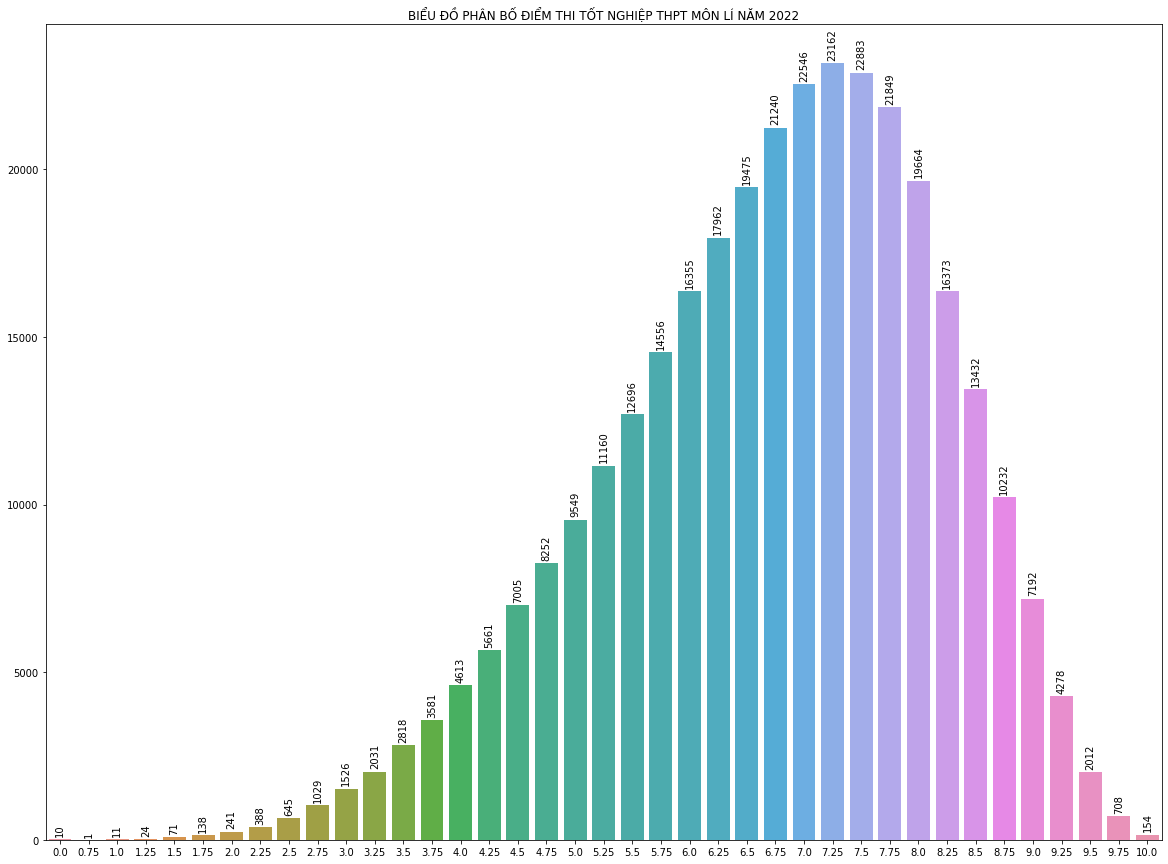

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Lí của cả nước năm 2022 cho thấy: Có 325523 thí sinh tham gia thi bài thi Lí trong đó điểm trung bình là 6.72 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 7.25 điểm. Số thí sinh có điểm <= 1 là 22 (chiếm tỉ lệ 0.007%); số thí sinh dưới trung bình là 38045 (chiếm tỉ lệ 11.687%); có 154 thí sinh đạt điểm 10.


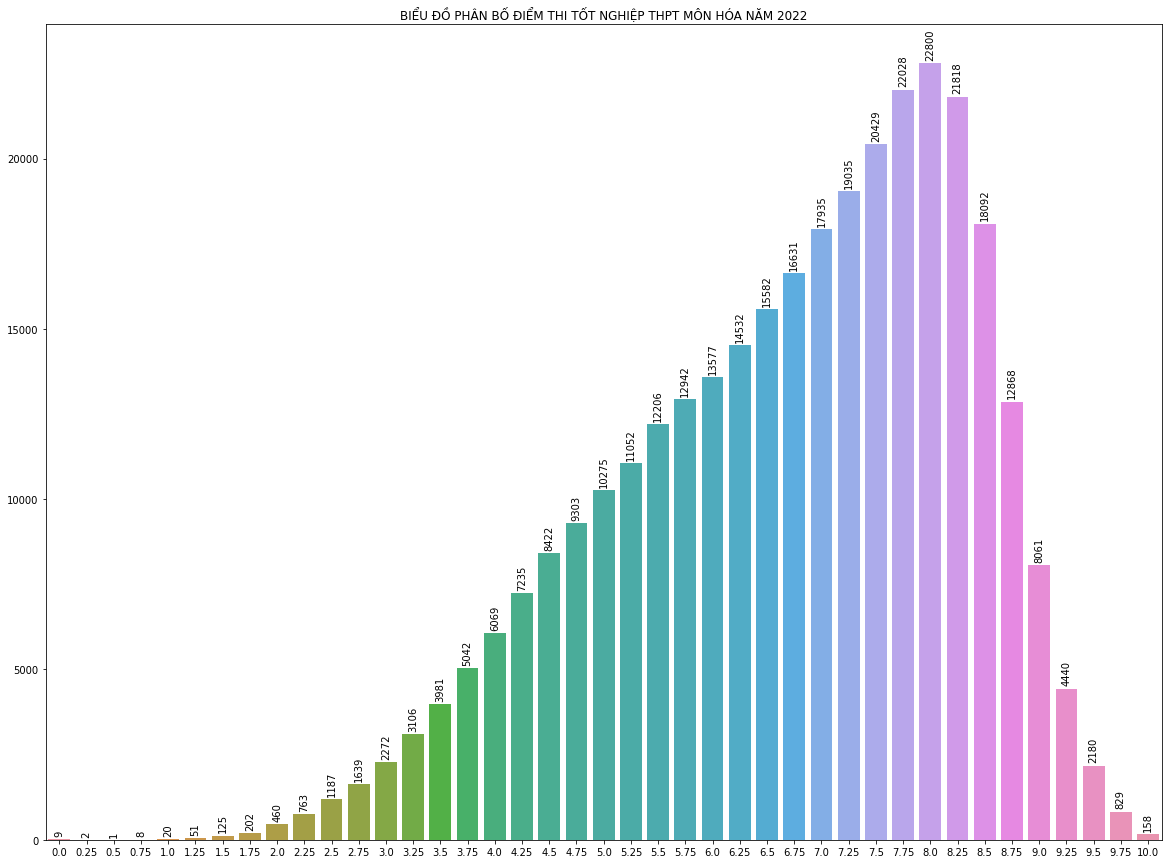

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Hóa của cả nước năm 2022 cho thấy: Có 327367 thí sinh tham gia thi bài thi Hóa trong đó điểm trung bình là 6.70 điểm, điểm trung vị là 7.00 điểm, điểm số có nhiều thí sinh đạt nhất là 8.00 điểm. Số thí sinh có điểm <= 1 là 40 (chiếm tỉ lệ 0.012%); số thí sinh dưới trung bình là 49897 (chiếm tỉ lệ 15.242%); có 158 thí sinh đạt điểm 10.


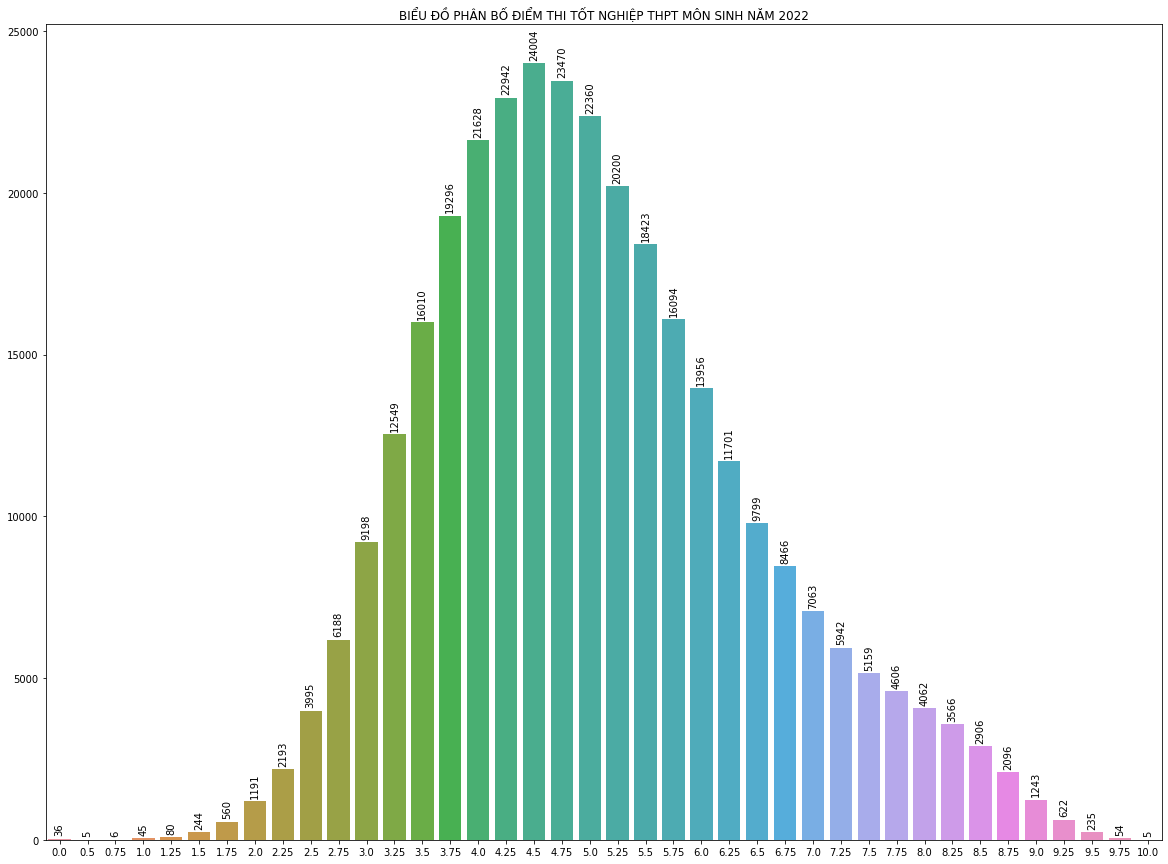

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Sinh của cả nước năm 2022 cho thấy: Có 322198 thí sinh tham gia thi bài thi Sinh trong đó điểm trung bình là 5.02 điểm, điểm trung vị là 4.75 điểm, điểm số có nhiều thí sinh đạt nhất là 4.50 điểm. Số thí sinh có điểm <= 1 là 92 (chiếm tỉ lệ 0.029%); số thí sinh dưới trung bình là 163640 (chiếm tỉ lệ 50.789%); có 5 thí sinh đạt điểm 10.


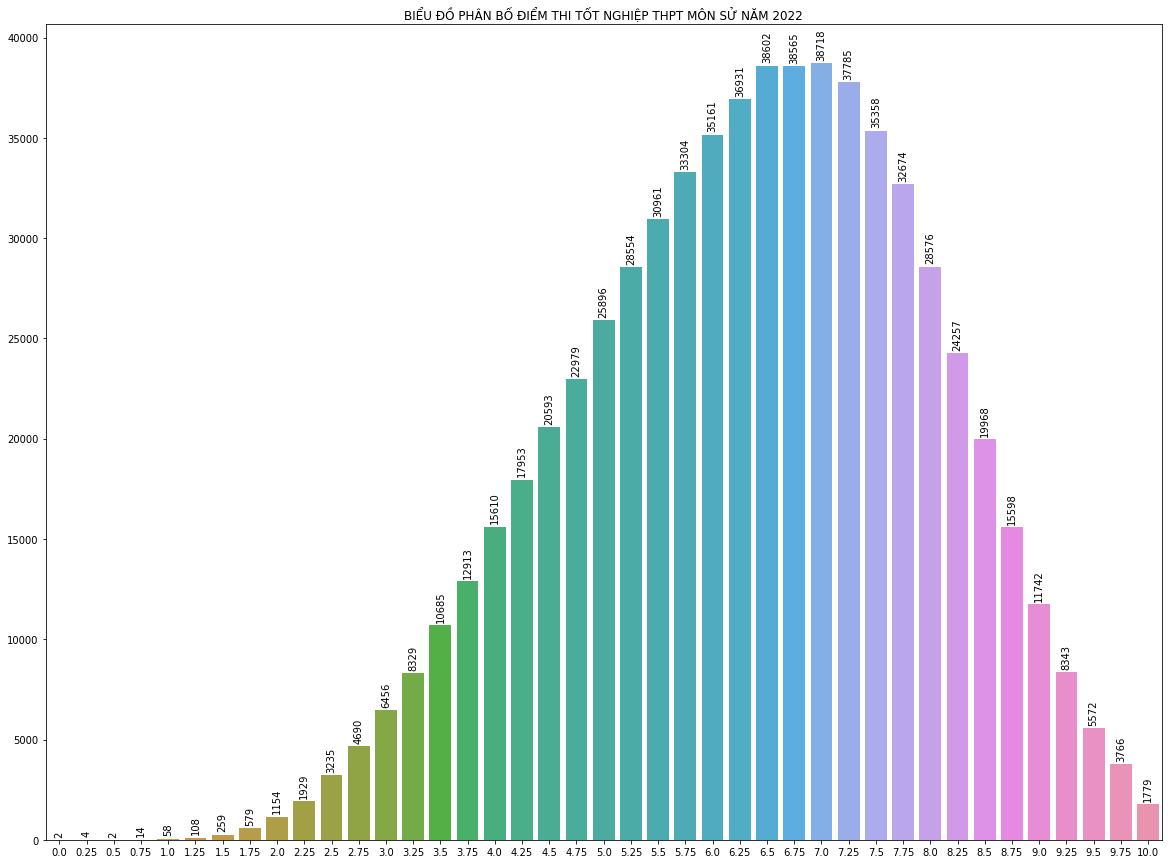

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Sử của cả nước năm 2022 cho thấy: Có 659662 thí sinh tham gia thi bài thi Sử trong đó điểm trung bình là 6.34 điểm, điểm trung vị là 6.50 điểm, điểm số có nhiều thí sinh đạt nhất là 7.00 điểm. Số thí sinh có điểm <= 1 là 80 (chiếm tỉ lệ 0.012%); số thí sinh dưới trung bình là 127552 (chiếm tỉ lệ 19.336%); có 1779 thí sinh đạt điểm 10.


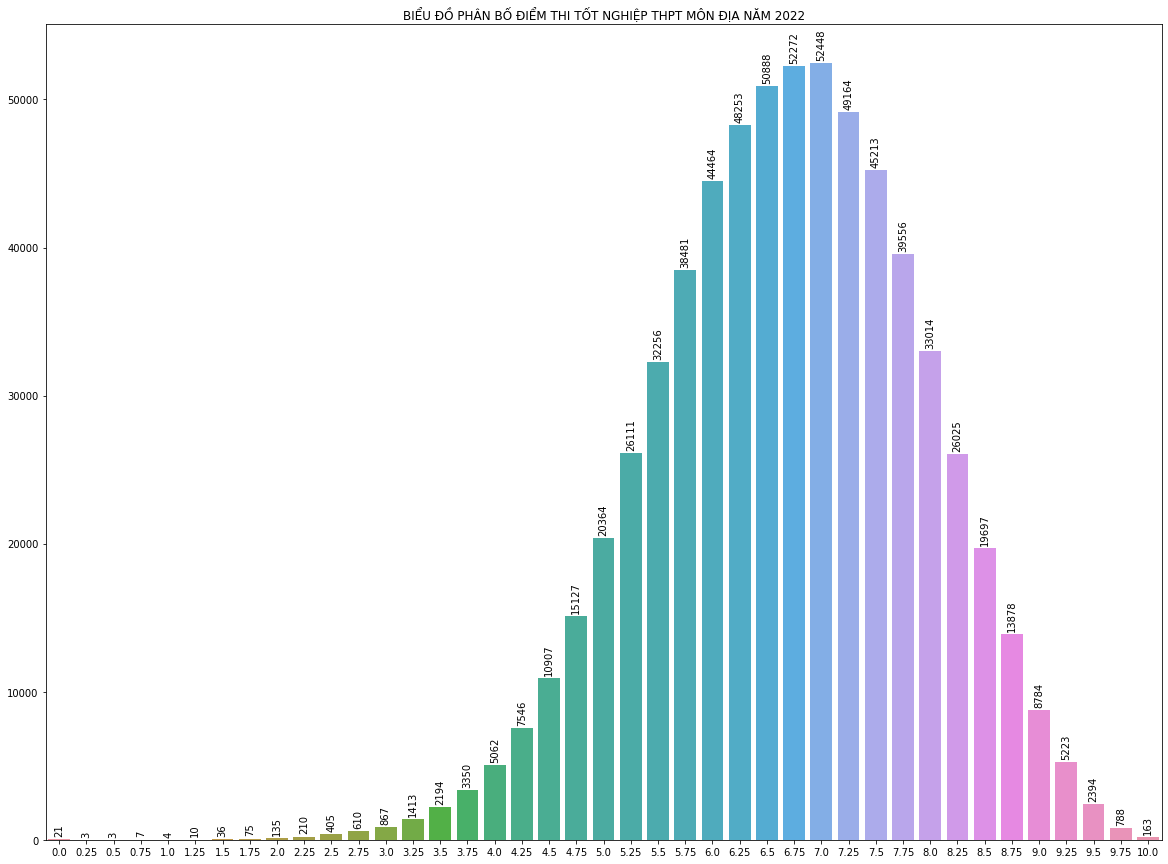

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn Địa của cả nước năm 2022 cho thấy: Có 657421 thí sinh tham gia thi bài thi Địa trong đó điểm trung bình là 6.68 điểm, điểm trung vị là 6.75 điểm, điểm số có nhiều thí sinh đạt nhất là 7.00 điểm. Số thí sinh có điểm <= 1 là 38 (chiếm tỉ lệ 0.006%); số thí sinh dưới trung bình là 47985 (chiếm tỉ lệ 7.299%); có 163 thí sinh đạt điểm 10.


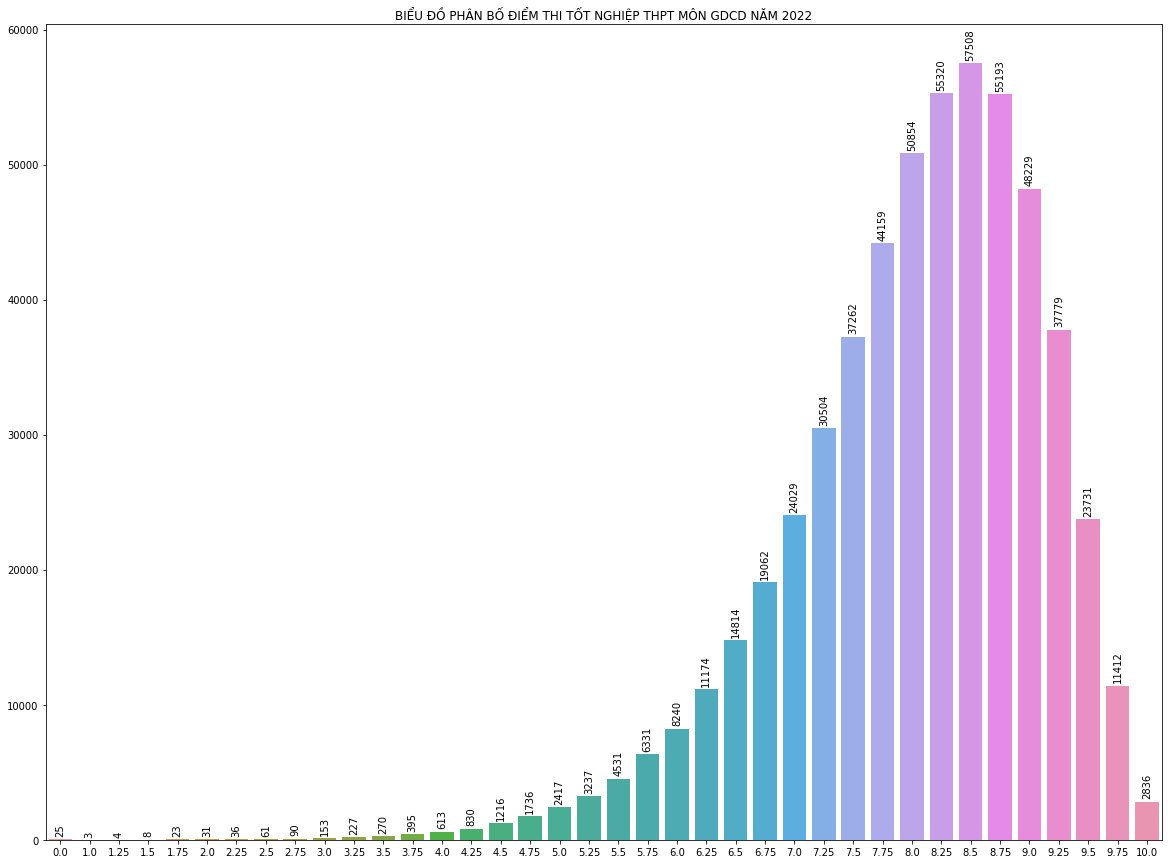

Kết quả phân tích phổ điểm thi tốt nghiệp THPT môn GDCD của cả nước năm 2022 cho thấy: Có 554343 thí sinh tham gia thi bài thi GDCD trong đó điểm trung bình là 8.03 điểm, điểm trung vị là 8.25 điểm, điểm số có nhiều thí sinh đạt nhất là 8.50 điểm. Số thí sinh có điểm <= 1 là 28 (chiếm tỉ lệ 0.005%); số thí sinh dưới trung bình là 5721 (chiếm tỉ lệ 1.032%); có 2836 thí sinh đạt điểm 10.


In [88]:
# draw histogram for each subject using seaborn histogram
for subject in SUBJECT_NAMES:
	fig, ax = plt.subplots(figsize=(20, 15))
	sns.barplot(data=grade_dict[subject], x='grade', y='count', ax=ax)
	ax.set_title(f'BIỂU ĐỒ PHÂN BỐ ĐIỂM THI TỐT NGHIỆP THPT MÔN {subject.upper()} NĂM {year}')
	ax.set_xlabel(None)
	ax.set_ylabel(None)
	ax.bar_label(ax.containers[0], rotation=90, padding=3)
	plt.show()
	analyze(grade_dict[subject], subject, year)